# 1.Global Power Plant Project
## Problem Statement:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw 

# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3. Import Dataset

In [2]:
df=pd.read_csv("IND_Database.csv")

In [3]:
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.7470,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.1952,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.3352,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.4342,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.0460,1338.093000,1563.457000,Central Electricity Authority,NaN


# 4. Shape of Dataset

In [4]:
df.shape

(908, 25)

**Dataset having 908 observation and 25 column.**

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

**Exploring dataset columns name.**

# 5.Basic Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

**Below are the observation:**
- There are 13 float columns and 12 object type columns

- There are lot of null values in dataset.

- estimated_genereation_gwh,other_fuel3,wepp_id columns doesn't have any data so we will drop this columns.

- other_fuel2 columns having only 1 record so this columns also we will drop.

## 5.1 Statistical Sumarry

In [7]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,908,1,IND,908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,908,1,India,908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,908,908,VIJAYWADA TPP-IV,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gppd_idnr,908,908,WRI1019964,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capacity_mw,908.0,NaN,NaN,NaN,321.046378,580.221767,0.0,16.8375,60.0,388.125,4760.0
latitude,862.0,NaN,NaN,NaN,21.196189,6.248627,8.1689,16.771575,21.7783,25.516375,34.649
longitude,862.0,NaN,NaN,NaN,77.447848,4.90726,68.6447,74.258975,76.71925,79.441475,95.408
primary_fuel,908,8,Coal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_fuel1,199,3,Oil,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_fuel2,1,1,Oil,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Below are the observation.**
- There are lot of null value present in dataset.

- There are some columns where no data is availabe like other_fuel3,wepp-id and estimated_generation_gwh.

- other_fuel2 having only 1 observation so this also we need to drop the columns.

- There are 55 type of primary fuel is available.

- There are lot of columns where mean value and 50% having much difference,which indicates that those column data not normally distributed.

# 6. Dealing with Null Value

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [9]:
percent_missing=round(df.isnull().sum()*100/len(df),2)
percent_missing=percent_missing[percent_missing>0].sort_values()
percent_missing

geolocation_source            2.09
latitude                      5.07
longitude                     5.07
commissioning_year           41.85
year_of_capacity_data        42.73
generation_data_source       50.44
generation_gwh_2017          51.21
generation_gwh_2016          51.87
generation_gwh_2015          53.19
generation_gwh_2014          55.84
generation_gwh_2013          57.71
owner                        62.33
other_fuel1                  78.08
other_fuel2                  99.89
wepp_id                     100.00
other_fuel3                 100.00
estimated_generation_gwh    100.00
dtype: float64

**From the above output we can see there are lot of missing value and some columns having completely null value.**

**Below are the observation.**

- 100% null value in estimated_generation_gwh, wepp_id and other_fuel3 columns.

- 98.89% of null value in other_fuel2 columns.

- 78.08% of null value in other_feul1 columns.

- All year data for generation_gwh columns and generation _data_source almost 50% data are missing.

## 6.1 Visualize the missing data.

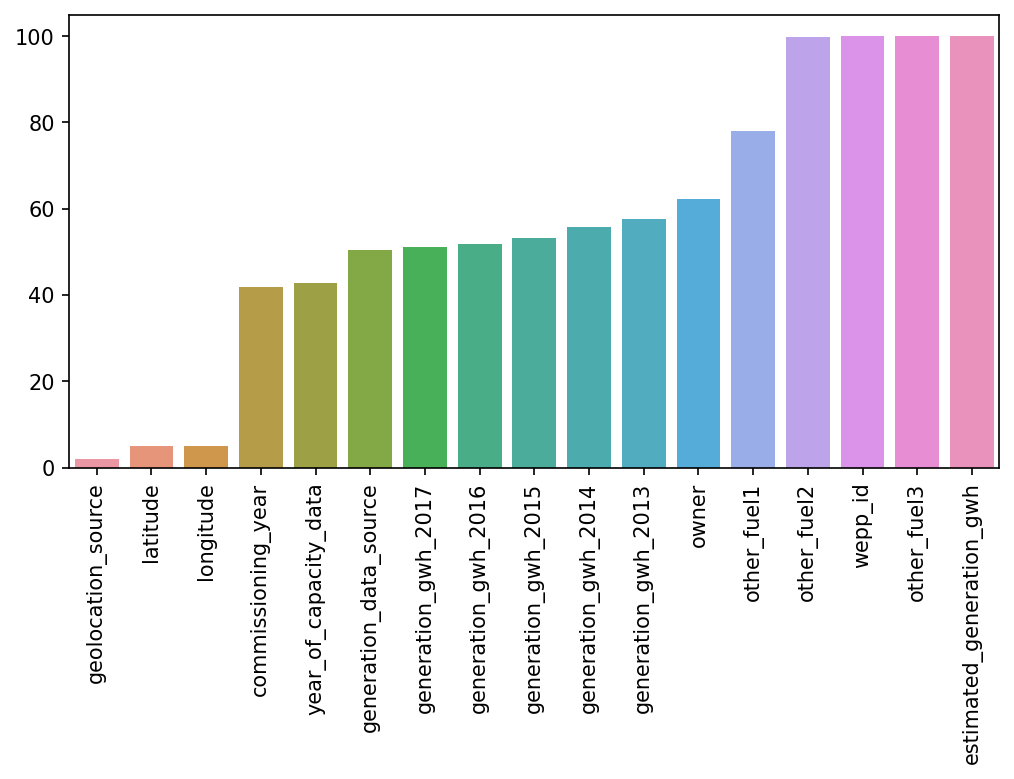

In [10]:
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_missing.index,y=percent_missing)
plt.xticks(rotation=90);

### 6.1 Dropping Column 100%,98.89% and 78% of missing data 

In [11]:
df.drop(["estimated_generation_gwh","wepp_id","other_fuel3","other_fuel2","other_fuel1"],axis=1,inplace=True)

In [12]:
df.shape

(908, 20)

**We can see all those 4 columns has been dropped from dataset.**

In [13]:
percent_missing=round(df.isnull().sum()*100/len(df),2)
percent_missing=percent_missing[percent_missing>0].sort_values()
percent_missing

geolocation_source         2.09
latitude                   5.07
longitude                  5.07
commissioning_year        41.85
year_of_capacity_data     42.73
generation_data_source    50.44
generation_gwh_2017       51.21
generation_gwh_2016       51.87
generation_gwh_2015       53.19
generation_gwh_2014       55.84
generation_gwh_2013       57.71
owner                     62.33
dtype: float64

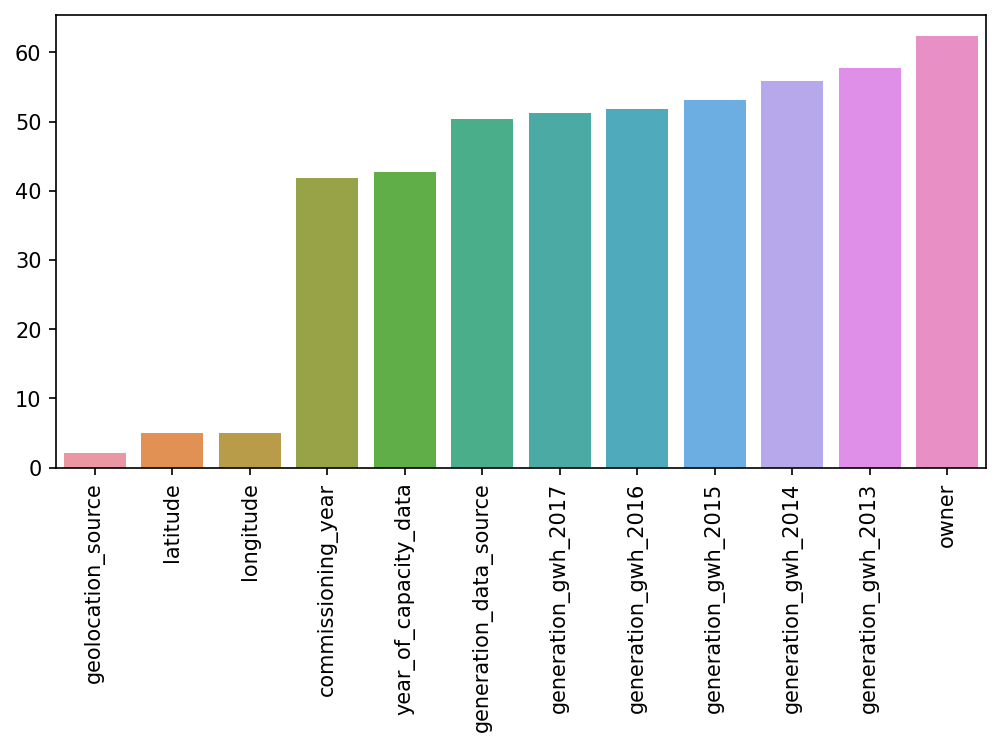

In [14]:
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_missing.index,y=percent_missing)
plt.xticks(rotation=90);

## 6.2 Dealing with geolocation_source

In [15]:
df["geolocation_source"].isnull().sum()

19

**As we can see there are 19 null rows in geolocation_source.**

In [16]:
df[df["geolocation_source"].isnull()].index

Int64Index([ 25,  68, 193, 209, 251, 387, 441, 503, 546, 656, 675, 771, 774,
            775, 776, 777, 829, 885, 887],
           dtype='int64')

**we have got the index of geolocation_source columns null value.**

**latitude null value.**

In [17]:
df[df["geolocation_source"].isnull()]["latitude"].index

Int64Index([ 25,  68, 193, 209, 251, 387, 441, 503, 546, 656, 675, 771, 774,
            775, 776, 777, 829, 885, 887],
           dtype='int64')

**longitude null value**

In [18]:
df[df["geolocation_source"].isnull()]["longitude"].index

Int64Index([ 25,  68, 193, 209, 251, 387, 441, 503, 546, 656, 675, 771, 774,
            775, 776, 777, 829, 885, 887],
           dtype='int64')

**We have found that index position of null value for geolocation_source are same with latitude and longitude columns,So by dropping this rows will help to reduces null values in latitude and longitude columns also.**

In [19]:
df.shape

(908, 20)

In [20]:
df=df.dropna(subset=["geolocation_source"],axis=0)

In [21]:
df.shape

(889, 20)

**As we can see from the dataset 19 row has been removed which were null values in geolocation_source,latitude and longitude columns.**

In [22]:
percent_missing=round(df.isnull().sum()*100/len(df),2)
percent_missing=percent_missing[percent_missing>0].sort_values()
percent_missing

latitude                   3.04
longitude                  3.04
commissioning_year        41.06
year_of_capacity_data     41.51
generation_data_source    49.38
generation_gwh_2017       50.17
generation_gwh_2016       50.84
generation_gwh_2015       52.19
generation_gwh_2014       54.89
generation_gwh_2013       56.81
owner                     63.10
dtype: float64

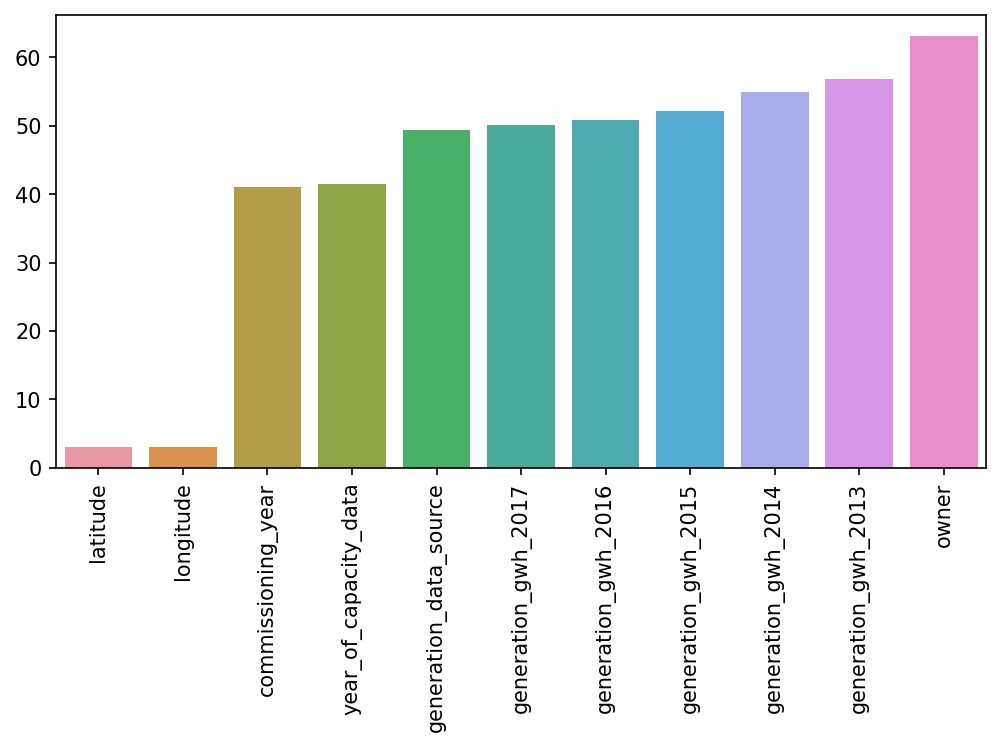

In [23]:
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_missing.index,y=percent_missing)
plt.xticks(rotation=90);

**Remaining null values after dropping geolocation_source null values.**

## 6.3 Dealing with latitude and longitude null values.

In [24]:
df["latitude"].isnull().sum()

27

In [25]:
df["longitude"].isnull().sum()

27

**As we can see both columns having 27 rows which are null value.**

In [26]:
df[df["latitude"].isnull()].index

Int64Index([ 14,  43,  46,  73, 179, 202, 330, 331, 333, 421, 423, 431, 436,
            467, 479, 480, 484, 539, 541, 681, 706, 712, 713, 732, 733, 742,
            785],
           dtype='int64')

In [27]:
df[df["longitude"].isnull()].index

Int64Index([ 14,  43,  46,  73, 179, 202, 330, 331, 333, 421, 423, 431, 436,
            467, 479, 480, 484, 539, 541, 681, 706, 712, 713, 732, 733, 742,
            785],
           dtype='int64')

**As we can see both the columns having same index or rows null values, so by dropping null values for one columns, will help us to remove null from these columns.**m

In [28]:
df.shape

(889, 20)

In [29]:
df=df.dropna(subset=["latitude"],axis=0)

In [30]:
df.shape

(862, 20)

**we can see total 27 rows has been dropped from the dataset.**

In [31]:
percent_missing=round(df.isnull().sum()*100/len(df),2)
percent_missing=percent_missing[percent_missing>0].sort_values()
percent_missing

commissioning_year        42.34
year_of_capacity_data     42.81
generation_data_source    49.19
generation_gwh_2017       50.00
generation_gwh_2016       50.46
generation_gwh_2015       51.62
generation_gwh_2014       54.18
generation_gwh_2013       56.15
owner                     61.95
dtype: float64

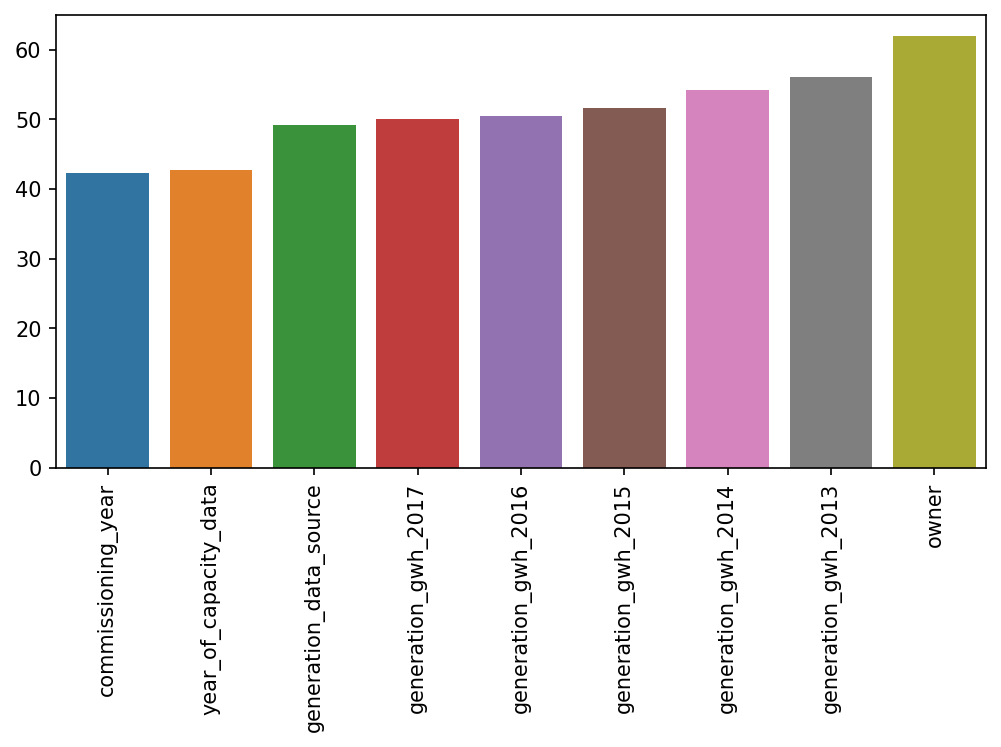

In [32]:
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_missing.index,y=percent_missing)
plt.xticks(rotation=90);

## 6.4 Dealing with commissioning year and year of capacity data.

**As we have seen these two coloumn are oject type data where year is mentioned and having total 369 and 365 rows of null, which indicate that we can't remove those rows becuase it will be huge data loss.So we will fill na with 0 value.**

In [33]:
df["year_of_capacity_data"].isnull().sum()

369

In [34]:
df["commissioning_year"].isnull().sum()

365

In [35]:
df["year_of_capacity_data"]=df["year_of_capacity_data"].fillna("0")

In [36]:
df["year_of_capacity_data"].isnull().sum()

0

In [37]:
df["commissioning_year"]=df["commissioning_year"].fillna("0")

In [38]:
df["commissioning_year"].isnull().sum()

0

In [39]:
percent_missing=round(df.isnull().sum()*100/len(df),2)
percent_missing=percent_missing[percent_missing>0].sort_values()
percent_missing

generation_data_source    49.19
generation_gwh_2017       50.00
generation_gwh_2016       50.46
generation_gwh_2015       51.62
generation_gwh_2014       54.18
generation_gwh_2013       56.15
owner                     61.95
dtype: float64

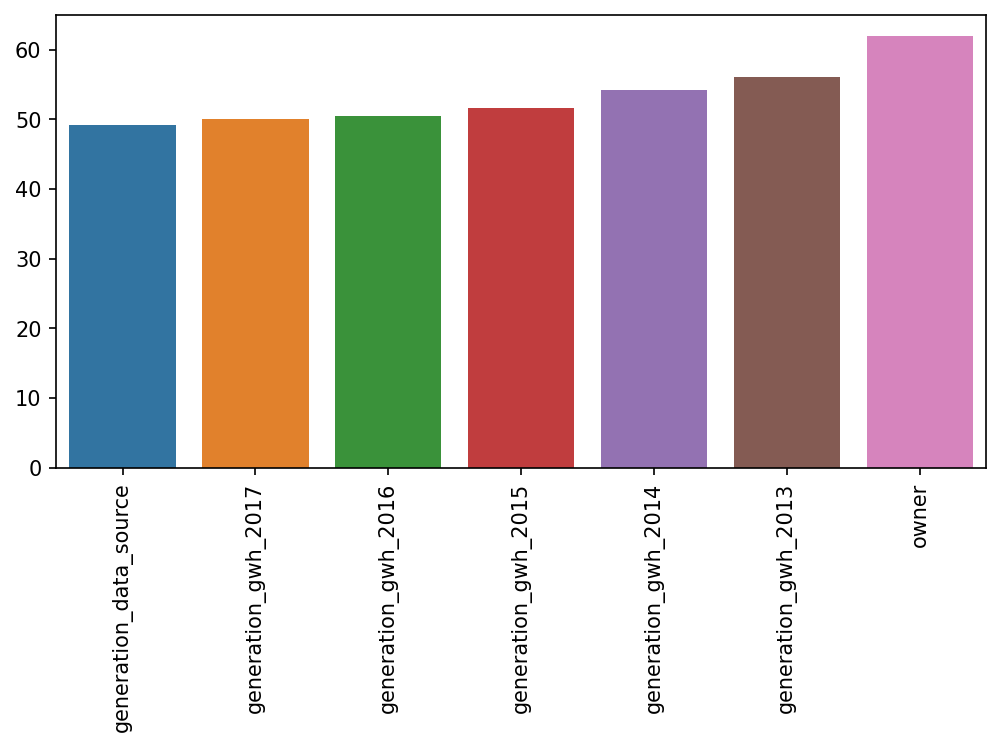

In [40]:
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_missing.index,y=percent_missing)
plt.xticks(rotation=90);

## 6.5 Dealing with Generation_data_source

In [41]:
df["generation_data_source"].isnull().sum()

424

**We will fill this data with source columns as generation data source define from source columns.**

In [42]:
null_gds=df[df["generation_data_source"].isnull()]

In [43]:
fill_source=null_gds["source"]

In [44]:
null_gds["generation_data_source"]=fill_source

In [45]:
null_gds=null_gds["generation_data_source"]

In [46]:
null_gds

0      National Renewable Energy Laboratory
1                      Ultratech Cement ltd
2                                       CDM
13            Central Electricity Authority
17                         Hindustan Pvt lt
                       ...                 
901                 Yashwantrao Krishna ssk
904     Karnataka Power Corporation Limited
905                                     CDM
906                      Hindustan Zinc ltd
907                                     CDM
Name: generation_data_source, Length: 424, dtype: object

In [47]:
df["generation_data_source"]=df["generation_data_source"].fillna(null_gds)

In [48]:
df["generation_data_source"].isnull().sum()

0

**have updated generation data source null value with source column value.**

In [49]:
percent_missing=round(df.isnull().sum()*100/len(df),2)
percent_missing=percent_missing[percent_missing>0].sort_values()
percent_missing

generation_gwh_2017    50.00
generation_gwh_2016    50.46
generation_gwh_2015    51.62
generation_gwh_2014    54.18
generation_gwh_2013    56.15
owner                  61.95
dtype: float64

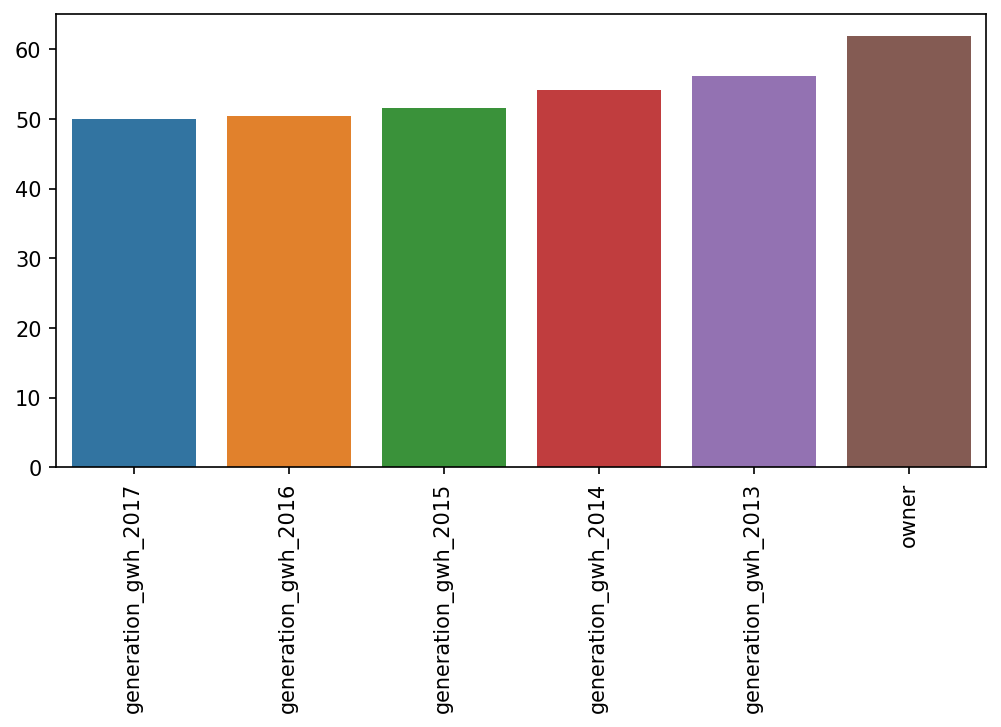

In [50]:
plt.figure(figsize=(8,4),dpi=150)
sns.barplot(x=percent_missing.index,y=percent_missing)
plt.xticks(rotation=90);

# 6.6 Daling with generation_gwh year column.

In [51]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                     534
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013       484
generation_gwh_2014       467
generation_gwh_2015       445
generation_gwh_2016       435
generation_gwh_2017       431
generation_data_source      0
dtype: int64

**As we can analyse that lot of generation gwh year data value is null, we can't remove those null becuase by doing this we would loose lot of data information, so we will fill with mean value of the columns.**

In [52]:
gwh_2013_mean=df["generation_gwh_2013"].mean()

In [53]:
df["generation_gwh_2013"]=df["generation_gwh_2013"].fillna(gwh_2013_mean)

In [54]:
gwh_2014_mean=df["generation_gwh_2014"].mean()

In [55]:
df["generation_gwh_2014"]=df["generation_gwh_2014"].fillna(gwh_2014_mean)

In [56]:
gwh_2015_mean=df["generation_gwh_2015"].mean()

In [57]:
df["generation_gwh_2015"]=df["generation_gwh_2015"].fillna(gwh_2015_mean)

In [58]:
gwh_2016_mean=df["generation_gwh_2016"].mean()

In [59]:
df["generation_gwh_2016"]=df["generation_gwh_2016"].fillna(gwh_2016_mean)

In [60]:
gwh_2017_mean=df["generation_gwh_2017"].mean()

In [61]:
df["generation_gwh_2017"]=df["generation_gwh_2017"].fillna(gwh_2017_mean)

In [62]:
percent_missing=round(df.isnull().sum()*100/len(df),2)
percent_missing=percent_missing[percent_missing>0].sort_values()
percent_missing

owner    61.95
dtype: float64

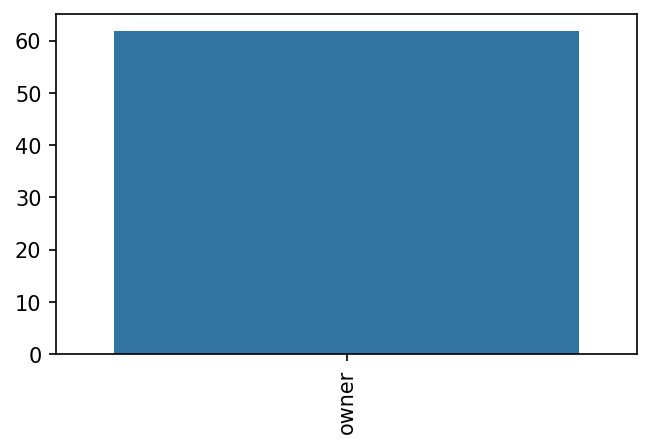

In [63]:
plt.figure(figsize=(5,3),dpi=150)
sns.barplot(x=percent_missing.index,y=percent_missing)
plt.xticks(rotation=90);

**Since there are 534 rows of null value present in owner columns so we can't remove those data so we will update with none.**

In [64]:
df["owner"]=df["owner"].fillna("None")

In [65]:
df["owner"].isnull().sum()

0

In [66]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

**There are no null value in present in dataset.**

# 7. Seperating Numerical and Categorical comuns

In [67]:
numeric_feature=[]
categorical_feature=[]
num=["int64","float64"]
cat=["O"]
for column in df.columns:
    if df[column].dtypes in num:
        numeric_feature.append(column)
    if df[column].dtypes in cat:
        categorical_feature.append(column)

In [68]:
numeric_feature

['capacity_mw',
 'latitude',
 'longitude',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [69]:
categorical_feature

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'year_of_capacity_data',
 'generation_data_source']

In [70]:
numeric_df=df[numeric_feature]

In [71]:
category_df=df[categorical_feature]

In [72]:
numeric_df

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
1,98.0,24.7663,74.6090,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
2,39.2,21.9038,69.3732,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
3,135.0,23.8712,91.3602,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2338.682337,2455.203873,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
905,25.5,15.2758,75.5811,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
906,80.0,24.3500,73.7477,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230


In [73]:
category_df

,country,country_long,name,gppd_idnr,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0,Ultratech Cement ltd
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0,CDM
3,IND,India,AGARTALA GT,IND0000001,Gas,2004.0,None,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,Coal,2015.0,None,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,Coal,2016.0,None,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,Solar,0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0,Karnataka Power Corporation Limited
905,IND,India,Yelisirur wind power project,WRI1026776,Wind,0,None,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0,CDM
906,IND,India,ZAWAR MINES,WRI1019901,Coal,0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0,Hindustan Zinc ltd


# 8. Exploratory Data Analysis

## 8.1 Univariate Analysis

**Country feature.**

<AxesSubplot:xlabel='country', ylabel='count'>

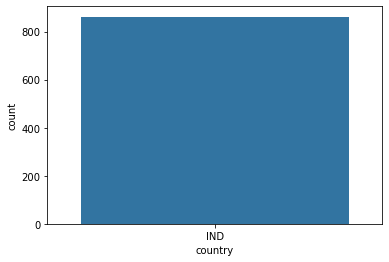

In [74]:
sns.countplot(df["country"])

**In dataset all data is belongs to India.**

**Country long**

<AxesSubplot:xlabel='country_long', ylabel='count'>

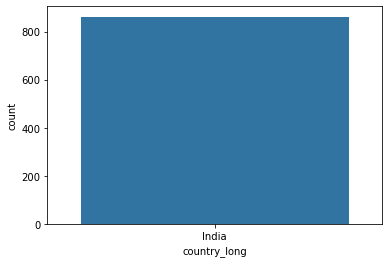

In [75]:
sns.countplot(df["country_long"])

**Country_long also have same country india.**

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

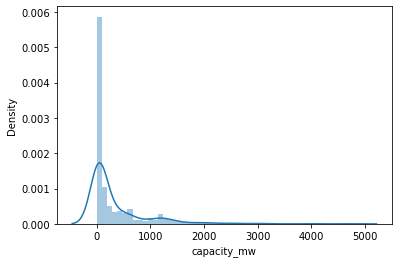

In [76]:
sns.distplot(df["capacity_mw"])

**Capacity_mw is our target variable.**

**latitude features**

<AxesSubplot:xlabel='latitude', ylabel='Density'>

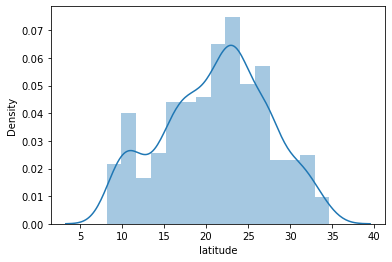

In [77]:
sns.distplot(df["latitude"])

**latitude data is normally distributed as shown in above plot.**

<AxesSubplot:xlabel='longitude', ylabel='Density'>

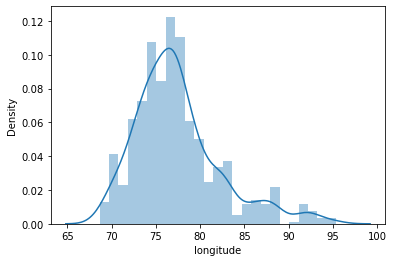

In [78]:
sns.distplot(df["longitude"])

**As shown in above plot longtitude data also normally distributed and having some outliers.**

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

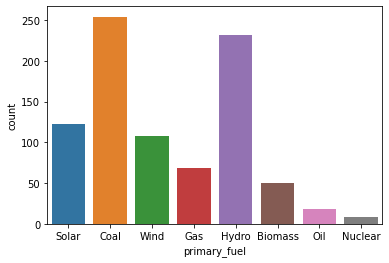

In [79]:
sns.countplot(df["primary_fuel"])

In [80]:
df["primary_fuel"].value_counts()

Coal       254
Hydro      232
Solar      123
Wind       108
Gas         68
Biomass     50
Oil         18
Nuclear      9
Name: primary_fuel, dtype: int64

**we can analyse from above that coal and hydro type fuel consumption is more for producing power.** 

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

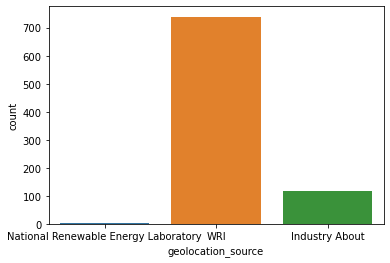

In [81]:
sns.countplot(df["geolocation_source"])

In [82]:
df["geolocation_source"].value_counts()

WRI                                     739
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

**Above are the abttribute of geoloaction_source, where WRI having highest attribute.**

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

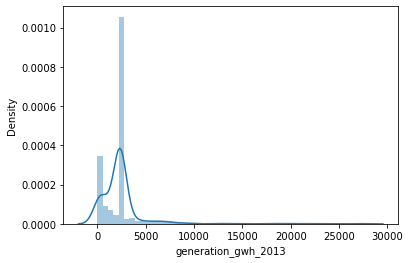

In [83]:
sns.distplot(df["generation_gwh_2013"])

**As we can see data is data is right skeweed.**

In [84]:
df["generation_gwh_2013"].describe()

count      862.000000
mean      2338.682337
std       2524.237979
min          0.000000
25%       1262.850700
50%       2338.682337
75%       2338.682337
max      27586.200000
Name: generation_gwh_2013, dtype: float64

**Generation_gwh_2013 data skeweed right side.**

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

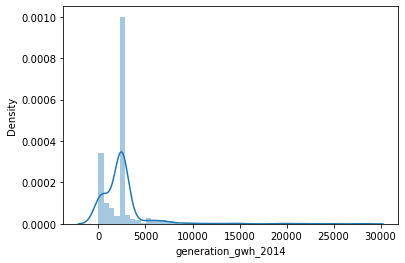

In [85]:
sns.distplot(df["generation_gwh_2014"])

**As we can see data is right skeweed.**

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

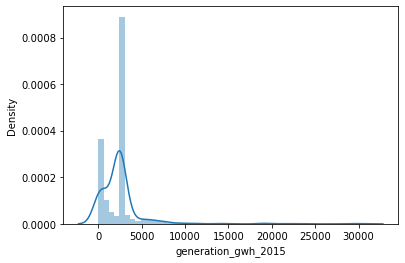

In [86]:
sns.distplot(df["generation_gwh_2015"])

**As we can see data is right skeweed.**

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

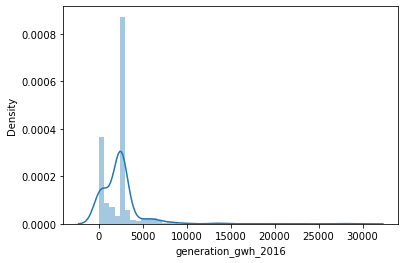

In [87]:
sns.distplot(df["generation_gwh_2016"])

**As we can see data is right skeweed.**

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

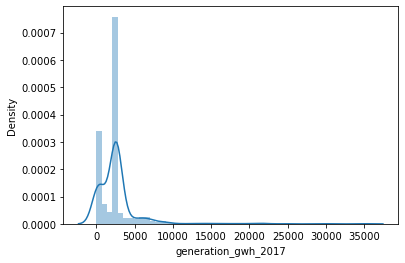

In [88]:
sns.distplot(df["generation_gwh_2017"])

**As we can see data is right skeweed.**

# 8.2 Bivariate Analysis

**capacity_mw vs latitude.**

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

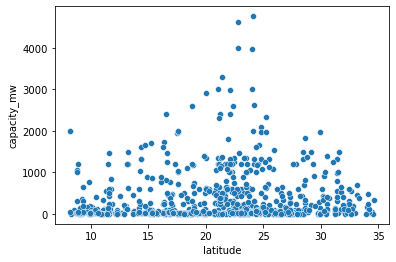

In [89]:
sns.scatterplot(x="latitude",y="capacity_mw",data=df)

**We can see latitude between 15 to 25 the capacity_mw is higher and also the releationship is non-linear.**

**capacity_mw vs longitude.**

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

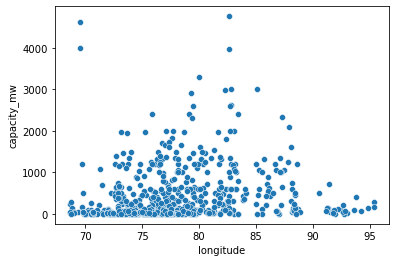

In [90]:
sns.scatterplot(x="longitude",y="capacity_mw",data=df)

**The relationship is non-linear and having some outliers.**

**capacity_mw vs primary_fuel.**

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

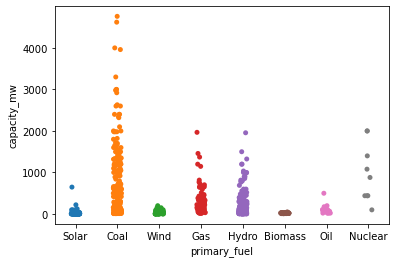

In [91]:
sns.stripplot(x="primary_fuel",y="capacity_mw",data=df)

**We can visually analyse that coal as primary fuel consumption is more to produce high capacity mw.**

**capacity mw vs generation gwh 2013**

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

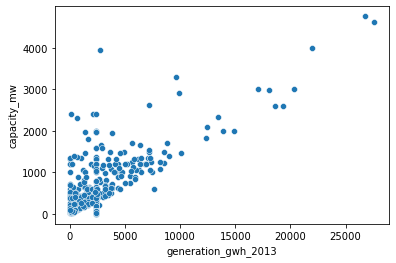

In [92]:
sns.scatterplot(x="generation_gwh_2013",y="capacity_mw",data=df)

**As we see there is linear relationship between capacity_mw and generation_gwh_2013.**

**capacity_mw vs generation_gwh_2014**

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

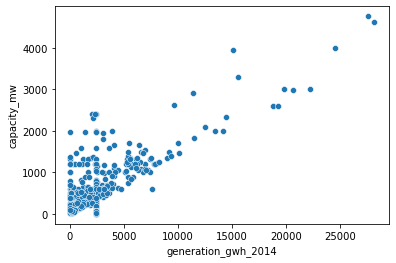

In [93]:
sns.scatterplot(x="generation_gwh_2014",y="capacity_mw",data=df)

**As we see there is linear relationship between capacity_mw and generation_gwh_2014.**

**capacity_mw vs generation_gwh_2015.**

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

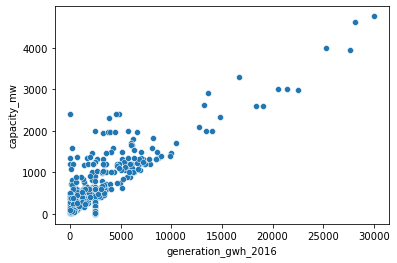

In [94]:
sns.scatterplot(x="generation_gwh_2016",y="capacity_mw",data=df)

**As we see there is linear relationship between capacity_mw and generation_gwh_2015.**

**capacity_mw vs generation gwh 2016.**

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

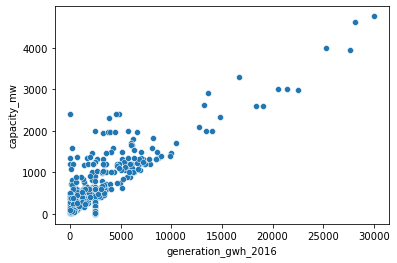

In [95]:
sns.scatterplot(x="generation_gwh_2016",y="capacity_mw",data=df)

**As we see there is linear relationship between capacity_mw and generation_gwh_2016.**

**capacity mw vs generation gwh 2017.**

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

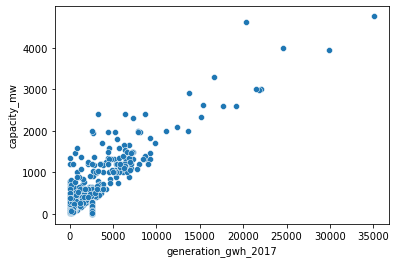

In [96]:
sns.scatterplot(x="generation_gwh_2017",y="capacity_mw",data=df)

**As we see there is linear relationship between capacity_mw and generation_gwh_2017.**

**primary_fuel vs latitude**

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

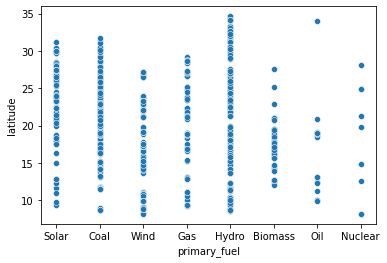

In [97]:
sns.scatterplot(x="primary_fuel",y="latitude",data=df)

**we can see the fuel consumption based on latitude.**

**longtitude vs primary_fuel**

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

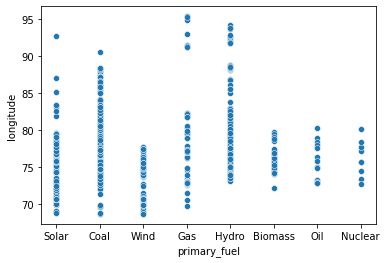

In [98]:
sns.scatterplot(x="primary_fuel",y="longitude",data=df)

**primary_fuel vs generation_gwh_2013,**

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

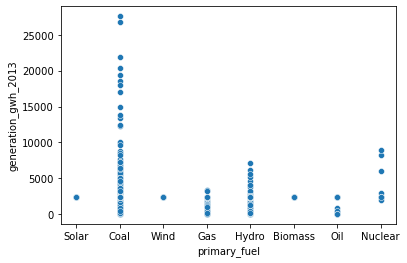

In [99]:
sns.scatterplot(x="primary_fuel",y="generation_gwh_2013",data=df)

**coal consumption is higher than any other primary fuel whicle compare to generation gwh for the year of 2013.**

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

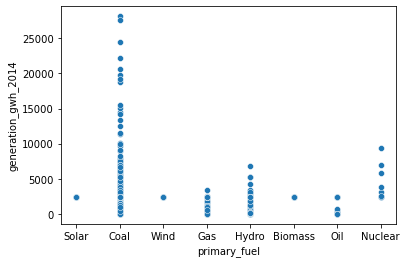

In [100]:
sns.scatterplot(x="primary_fuel",y="generation_gwh_2014",data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

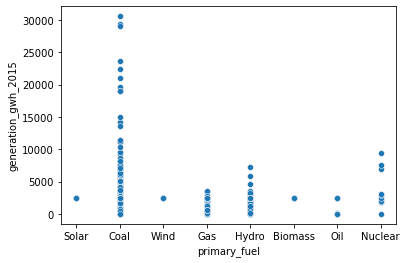

In [101]:
sns.scatterplot(x="primary_fuel",y="generation_gwh_2015",data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

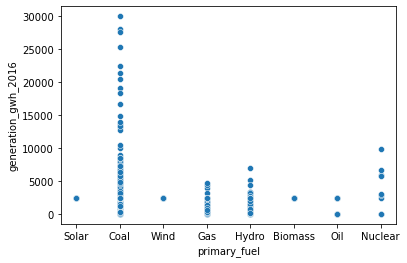

In [102]:
sns.scatterplot(x="primary_fuel",y="generation_gwh_2016",data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

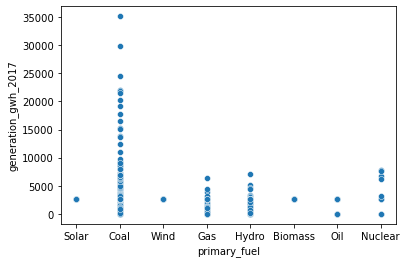

In [103]:
sns.scatterplot(x="primary_fuel",y="generation_gwh_2017",data=df)

**We can say that across all year generation gwh coal consumption is high compare to other fuel type.**

## 8.3 Multivariate Analysis

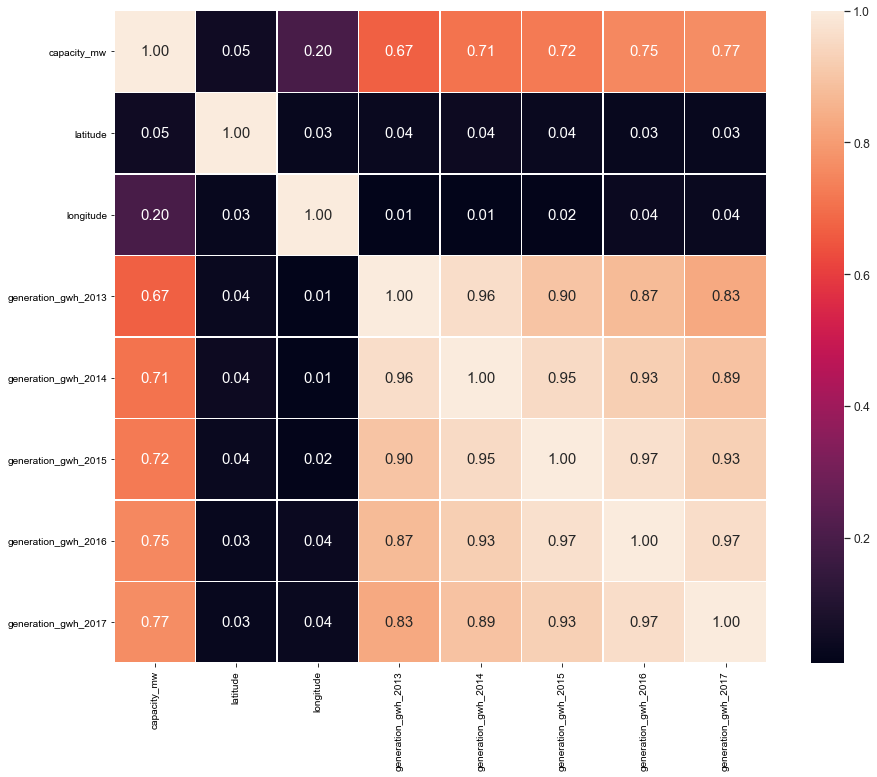

In [104]:
plt.subplots(figsize=(16,12))
cm=np.corrcoef(df[numeric_feature].values.T)
sns.set(font_scale=1.1)
heatmap=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt=".2f",annot_kws={"size":15},yticklabels=numeric_feature,xticklabels=numeric_feature,linewidths=.5)

**Below are the observation from heatmap.**
- We can see capacity_mw has very less impact of longtitue and latitude features.

- All generation gwh features are highly correleted with each other.

In [105]:
df.corr().capacity_mw.sort_values()

latitude               0.050107
longitude              0.198377
generation_gwh_2013    0.668162
generation_gwh_2014    0.705978
generation_gwh_2015    0.722832
generation_gwh_2016    0.753038
generation_gwh_2017    0.766368
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

**We can see latitude and longitude have very less corrleation with target variable.**

**Genearation gwh year vs capacity mw.**

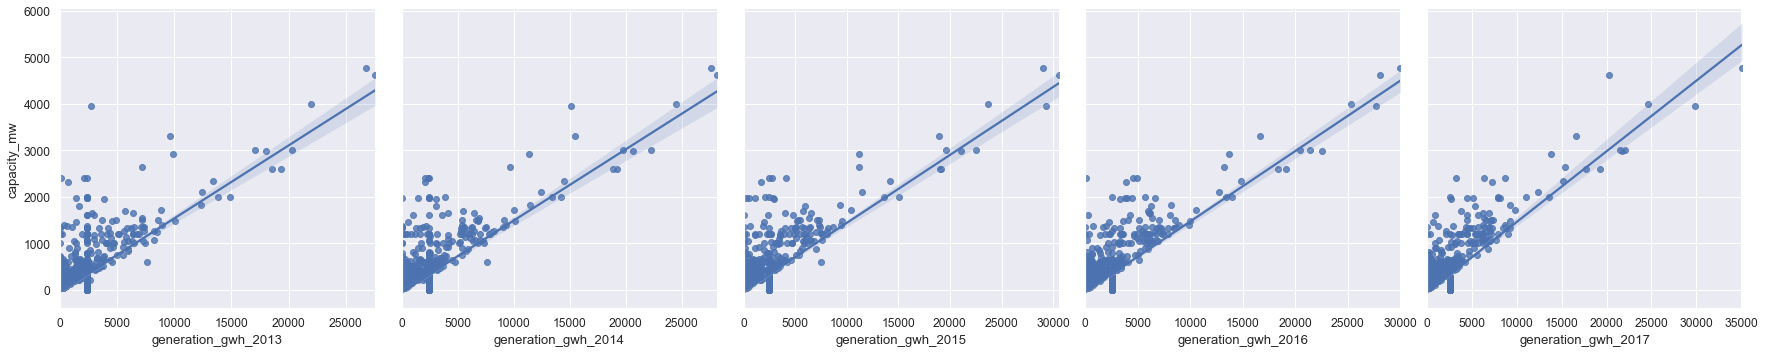

In [106]:
sns.pairplot(df,x_vars=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],y_vars='capacity_mw',size=5,aspect=1,kind='reg')

**As we can see generation gwh year featuers are in linear regression form.**

**Capacity mw vs primary fuel**

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

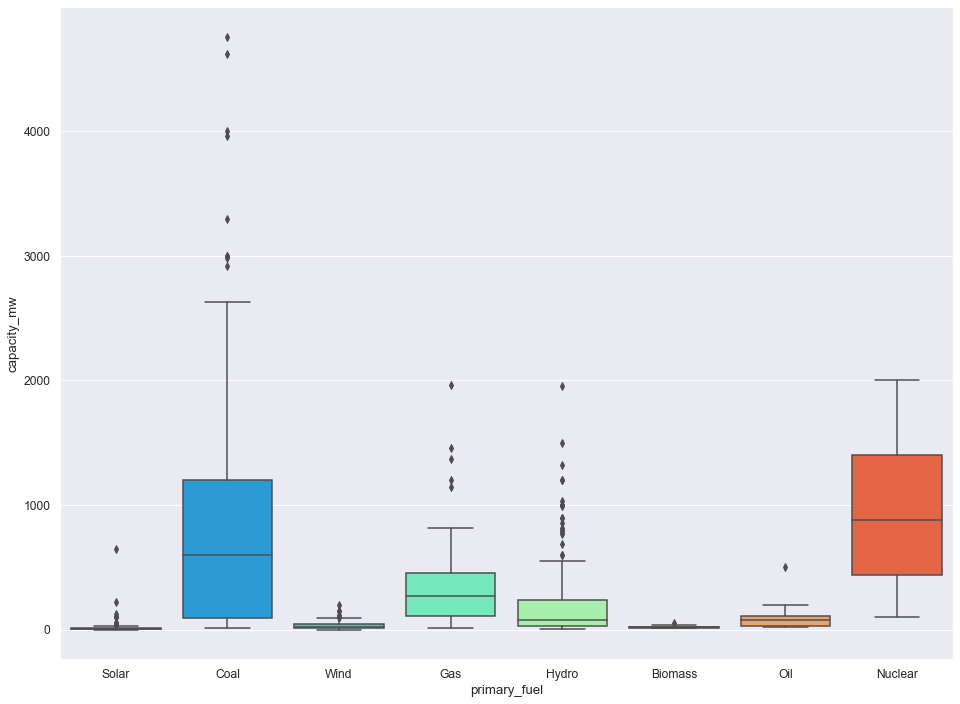

In [107]:
plt.subplots(figsize=(16,12))
sns.boxplot(x="primary_fuel",y="capacity_mw",data=df,palette="rainbow")

**Below are the observation:**
- We can see the distribution of capacity mw with comparision between primary fuel varibale.

- There are outliers present in primary fuel with compare with capacity mw.

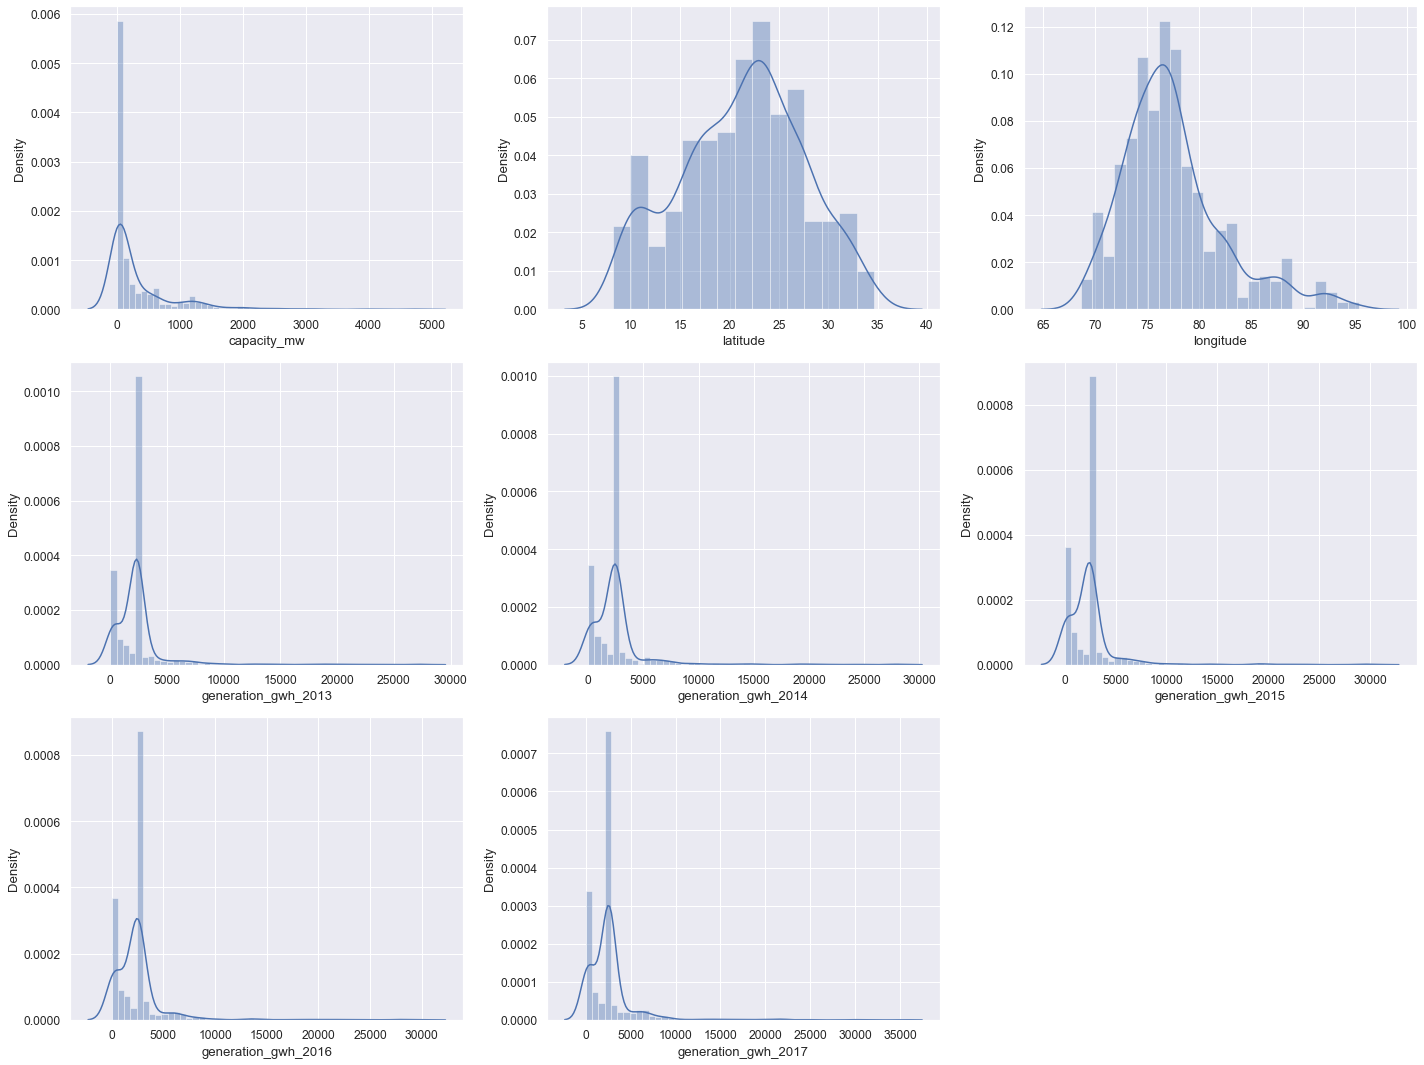

In [108]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feature:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
    plotnumber+=1
plt.tight_layout()   

**we can see the distribution of numeric feature in dataset. there are lot of skewness in data, which we will work in future.**

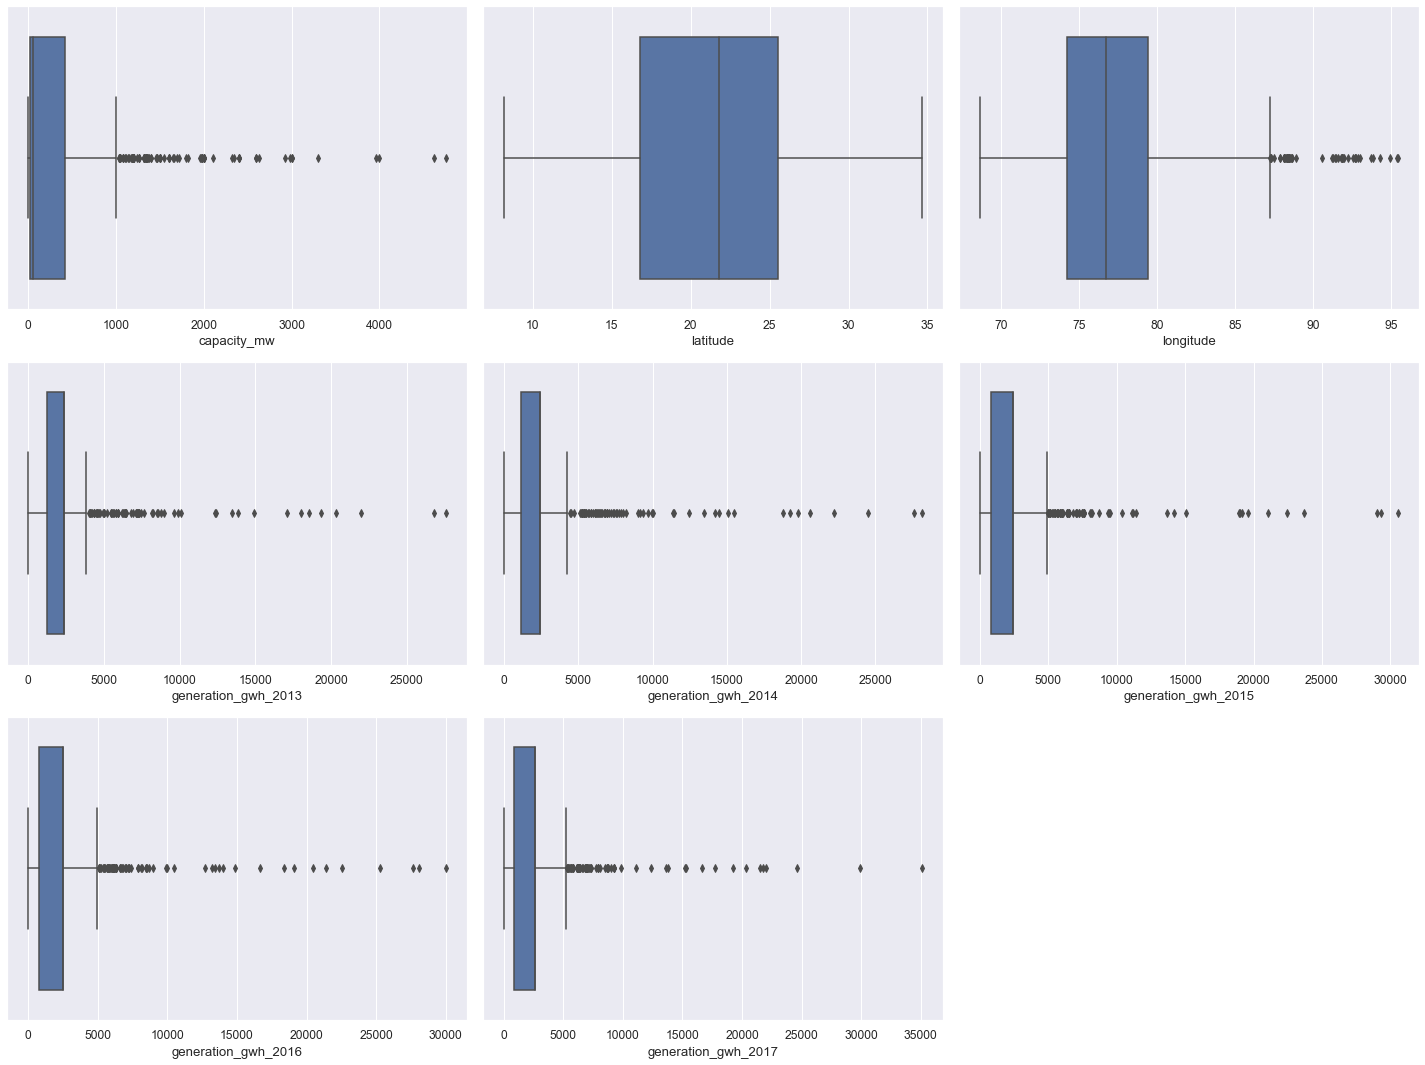

In [109]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feature:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
    plotnumber+=1
plt.tight_layout()  

**we can see there are lot of outliers in dataset.**

# 9. Feature Engineering

**we will convert our categorical columns into numeric column and will drop unwanted columns.**

## 9.1  Dropping unwanted categorical columns.

**Below are the columns we will drop as it will not impact our target variable capacity mw and primary fuel.**
- Country_long : we will drop this becuase country columns also having same country name i.e india.

- name: Since for our analysis, name feature will not impact our trarget variable.

- gppd_idnr: this featuer is represnt only unique id which will not have impact on our trarget variable.

- source : this feature represent the reporting of data source, so it will not requrire for our analysis.

- url: This features also would not require and need to drop becuase this is just url link.


In [110]:
df=df.drop(["country_long","name","gppd_idnr","source","url"],axis=1)

## 9.2 Label Encoder Technique

In [111]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

### Converting Country feature.

In [112]:
df["country"]=label_encoder.fit_transform(df["country"])

In [113]:
df

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230,National Renewable Energy Laboratory
1,0,98.0,24.7663,74.6090,Coal,0,Ultratech Cement ltd,WRI,0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230,Ultratech Cement ltd
2,0,39.2,21.9038,69.3732,Wind,0,AES,WRI,0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230,CDM
3,0,135.0,23.8712,91.3602,Gas,2004.0,None,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,0,1800.0,21.9603,82.4091,Coal,2015.0,None,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,1600.0,16.2949,77.3568,Coal,2016.0,None,WRI,2018.0,2338.682337,2455.203873,0.994875,233.596650,865.400000,Central Electricity Authority
904,0,3.0,12.8932,78.1654,Solar,0,Karnataka Power Corporation Limited,Industry About,0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230,Karnataka Power Corporation Limited
905,0,25.5,15.2758,75.5811,Wind,0,None,WRI,0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230,CDM
906,0,80.0,24.3500,73.7477,Coal,0,Hindustan Zinc ltd,WRI,0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230,Hindustan Zinc ltd


### Converting owner feature.

In [114]:
df["owner"]=label_encoder.fit_transform(df["owner"])

### Converting geolocation source feature.

In [115]:
df["geolocation_source"]=label_encoder.fit_transform(df["geolocation_source"])

### Converting generation data source

In [116]:
df["generation_data_source"]=label_encoder.fit_transform(df["generation_data_source"])

### Converting primary fuel ( Target variable)

In [117]:
df["primary_fuel"]=label_encoder.fit_transform(df["primary_fuel"])

### Convert commissioning year & year of capacity data columns into int

In [118]:
df["commissioning_year"]=df["commissioning_year"].astype(int)

In [119]:
df["year_of_capacity_data"]=df["year_of_capacity_data"].astype(int)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 907
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 862 non-null    int32  
 1   capacity_mw             862 non-null    float64
 2   latitude                862 non-null    float64
 3   longitude               862 non-null    float64
 4   primary_fuel            862 non-null    int32  
 5   commissioning_year      862 non-null    int32  
 6   owner                   862 non-null    int32  
 7   geolocation_source      862 non-null    int32  
 8   year_of_capacity_data   862 non-null    int32  
 9   generation_gwh_2013     862 non-null    float64
 10  generation_gwh_2014     862 non-null    float64
 11  generation_gwh_2015     862 non-null    float64
 12  generation_gwh_2016     862 non-null    float64
 13  generation_gwh_2017     862 non-null    float64
 14  generation_data_source  862 non-null    in

# 10. Dealing with Outliers

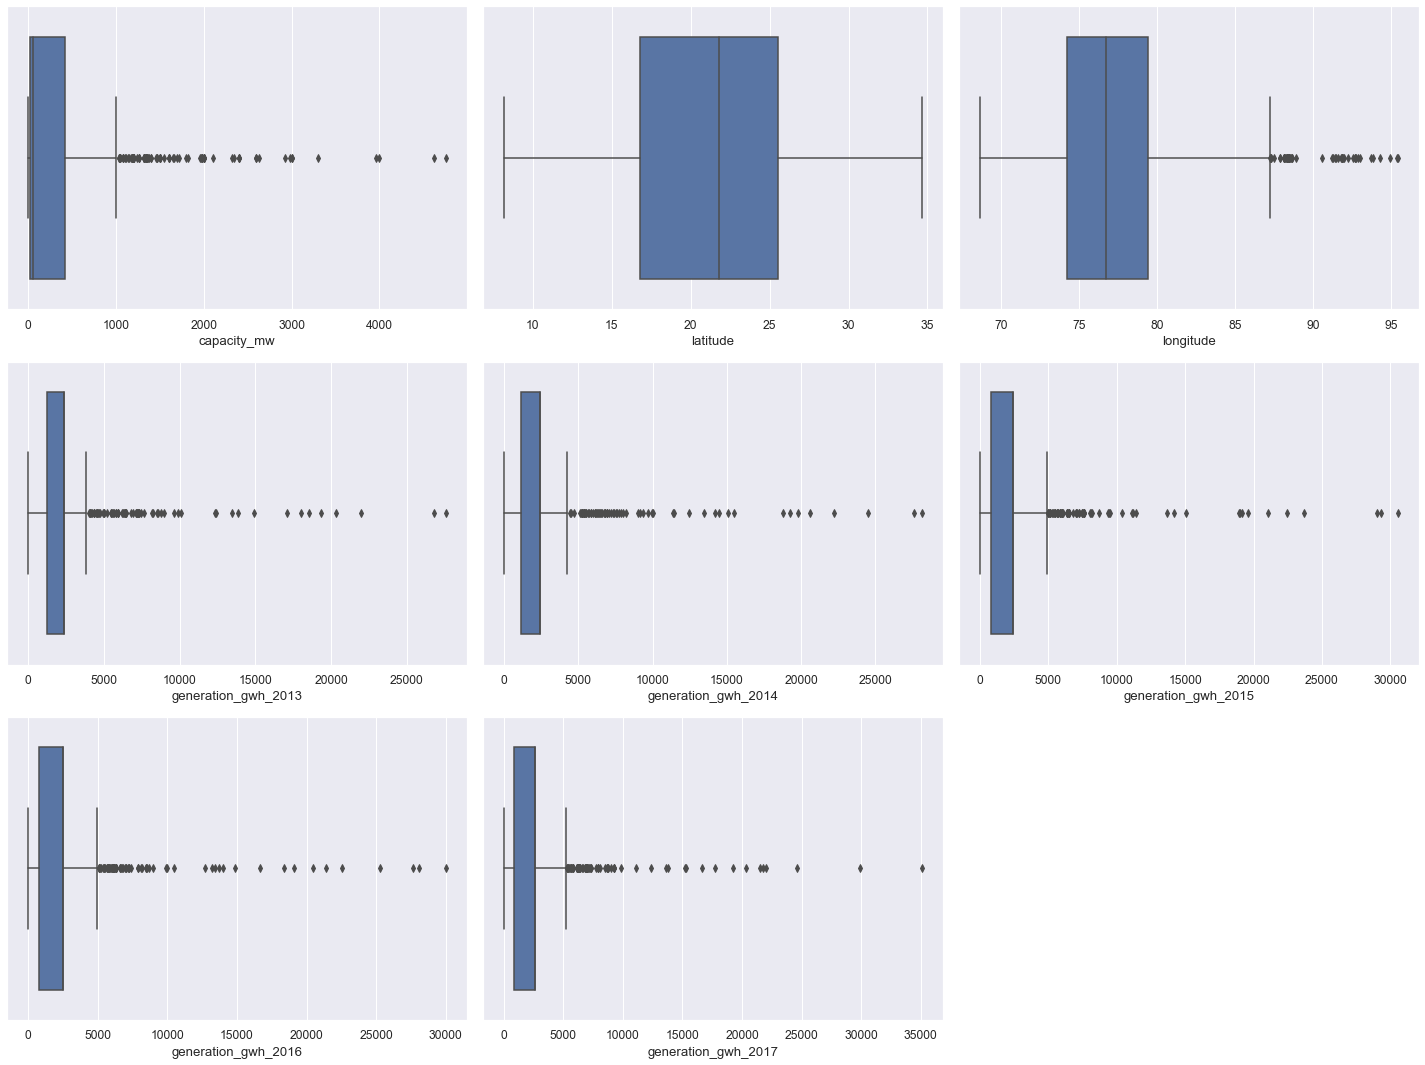

In [121]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feature:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
    plotnumber+=1
plt.tight_layout()  

### Dealing with longitude

<AxesSubplot:xlabel='longitude'>

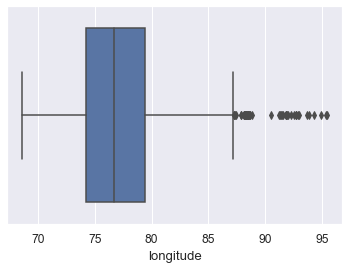

In [122]:
sns.boxplot(df["longitude"])

In [123]:
upper_limit=df["longitude"].mean()+3*df["longitude"].std()
lower_limit=df["longitude"].mean()-3*df["longitude"].std()

df["longitude"]=np.where(df["longitude"]>upper_limit,upper_limit,
                        np.where(df["longitude"]<lower_limit,lower_limit,
                                df["longitude"]
                                )
                        )

<AxesSubplot:xlabel='longitude'>

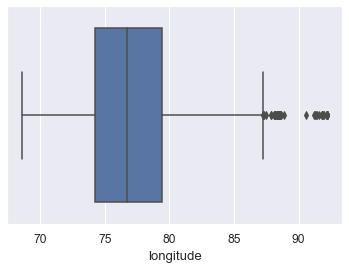

In [124]:
sns.boxplot(df["longitude"])

### Dealing with generation gwh 2013

<AxesSubplot:xlabel='generation_gwh_2013'>

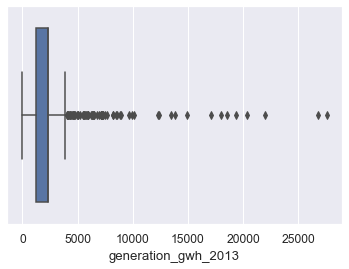

In [125]:
sns.boxplot(df["generation_gwh_2013"])

In [126]:
upper_limit=df["generation_gwh_2013"].mean()+3*df["generation_gwh_2013"].std()
lower_limit=df["generation_gwh_2013"].mean()-3*df["generation_gwh_2013"].std()

df["generation_gwh_2013"]=np.where(df["generation_gwh_2013"]>upper_limit,upper_limit,
                        np.where(df["generation_gwh_2013"]<lower_limit,lower_limit,
                                df["generation_gwh_2013"]
                                )
                        )

<AxesSubplot:xlabel='generation_gwh_2013'>

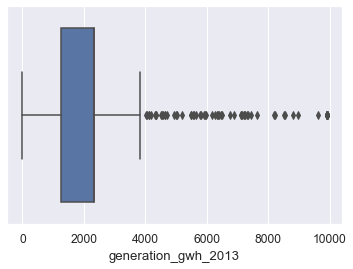

In [127]:
sns.boxplot(df["generation_gwh_2013"])

### Dealing with generation gwh 2014

<AxesSubplot:xlabel='generation_gwh_2014'>

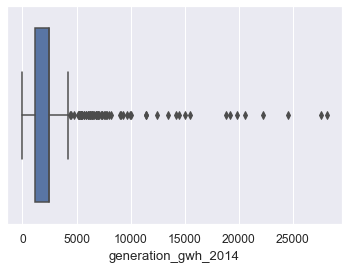

In [128]:
sns.boxplot(df["generation_gwh_2014"])

In [129]:
upper_limit=df["generation_gwh_2014"].mean()+3*df["generation_gwh_2014"].std()
lower_limit=df["generation_gwh_2014"].mean()-3*df["generation_gwh_2014"].std()

df["generation_gwh_2014"]=np.where(df["generation_gwh_2014"]>upper_limit,upper_limit,
                        np.where(df["generation_gwh_2014"]<lower_limit,lower_limit,
                                df["generation_gwh_2014"]
                                )
                        )

<AxesSubplot:xlabel='generation_gwh_2014'>

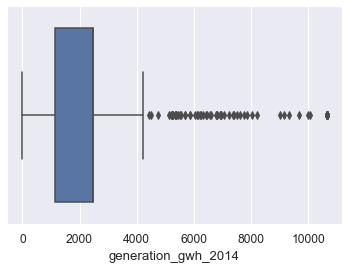

In [130]:
sns.boxplot(df["generation_gwh_2014"])

### Dealing with generation gwh 2015

<AxesSubplot:xlabel='generation_gwh_2015'>

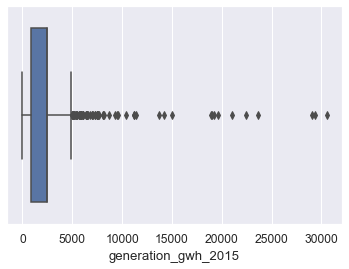

In [131]:
sns.boxplot(df["generation_gwh_2015"])

In [132]:
upper_limit=df["generation_gwh_2015"].mean()+3*df["generation_gwh_2015"].std()
lower_limit=df["generation_gwh_2015"].mean()-3*df["generation_gwh_2015"].std()

df["generation_gwh_2015"]=np.where(df["generation_gwh_2015"]>upper_limit,upper_limit,
                        np.where(df["generation_gwh_2015"]<lower_limit,lower_limit,
                                df["generation_gwh_2015"]
                                )
                        )

<AxesSubplot:xlabel='generation_gwh_2015'>

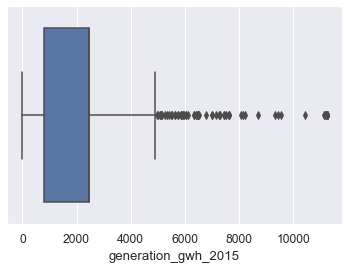

In [133]:
sns.boxplot(df["generation_gwh_2015"])

### Dealing with generation gwh 2016

<AxesSubplot:xlabel='generation_gwh_2016'>

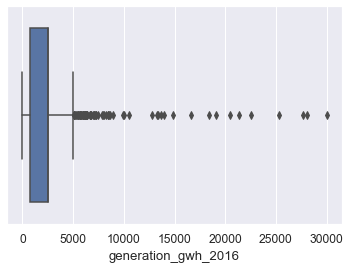

In [134]:
sns.boxplot(df["generation_gwh_2016"])

In [135]:
upper_limit=df["generation_gwh_2016"].mean()+3*df["generation_gwh_2016"].std()
lower_limit=df["generation_gwh_2016"].mean()-3*df["generation_gwh_2016"].std()

df["generation_gwh_2016"]=np.where(df["generation_gwh_2016"]>upper_limit,upper_limit,
                        np.where(df["generation_gwh_2016"]<lower_limit,lower_limit,
                                df["generation_gwh_2016"]
                                )
                        )

<AxesSubplot:xlabel='generation_gwh_2016'>

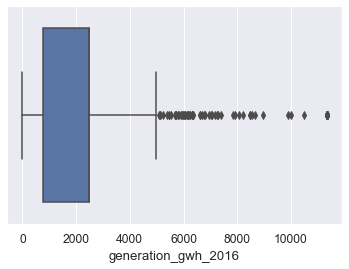

In [136]:
sns.boxplot(df["generation_gwh_2016"])

### Dealing with generation gwh 2017

<AxesSubplot:xlabel='generation_gwh_2017'>

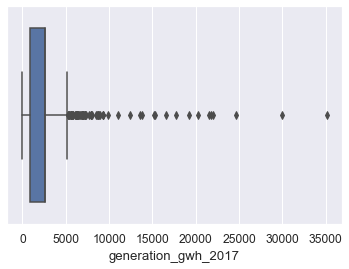

In [137]:
sns.boxplot(df["generation_gwh_2017"])

In [138]:
upper_limit=df["generation_gwh_2017"].mean()+3*df["generation_gwh_2017"].std()
lower_limit=df["generation_gwh_2017"].mean()-3*df["generation_gwh_2017"].std()

df["generation_gwh_2017"]=np.where(df["generation_gwh_2017"]>upper_limit,upper_limit,
                        np.where(df["generation_gwh_2017"]<lower_limit,lower_limit,
                                df["generation_gwh_2017"]
                                )
                        )

<AxesSubplot:xlabel='generation_gwh_2017'>

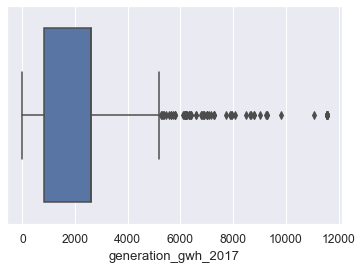

In [139]:
sns.boxplot(df["generation_gwh_2017"])

# 11. Checking skewness of data

In [140]:
df.skew()

country                   0.000000
capacity_mw               3.106672
latitude                 -0.143622
longitude                 1.022213
primary_fuel              0.506373
commissioning_year       -0.309951
owner                    -0.894160
geolocation_source       -2.074108
year_of_capacity_data    -0.291234
generation_gwh_2013       2.173184
generation_gwh_2014       2.188931
generation_gwh_2015       2.211860
generation_gwh_2016       2.132792
generation_gwh_2017       2.015853
generation_data_source    1.780661
dtype: float64

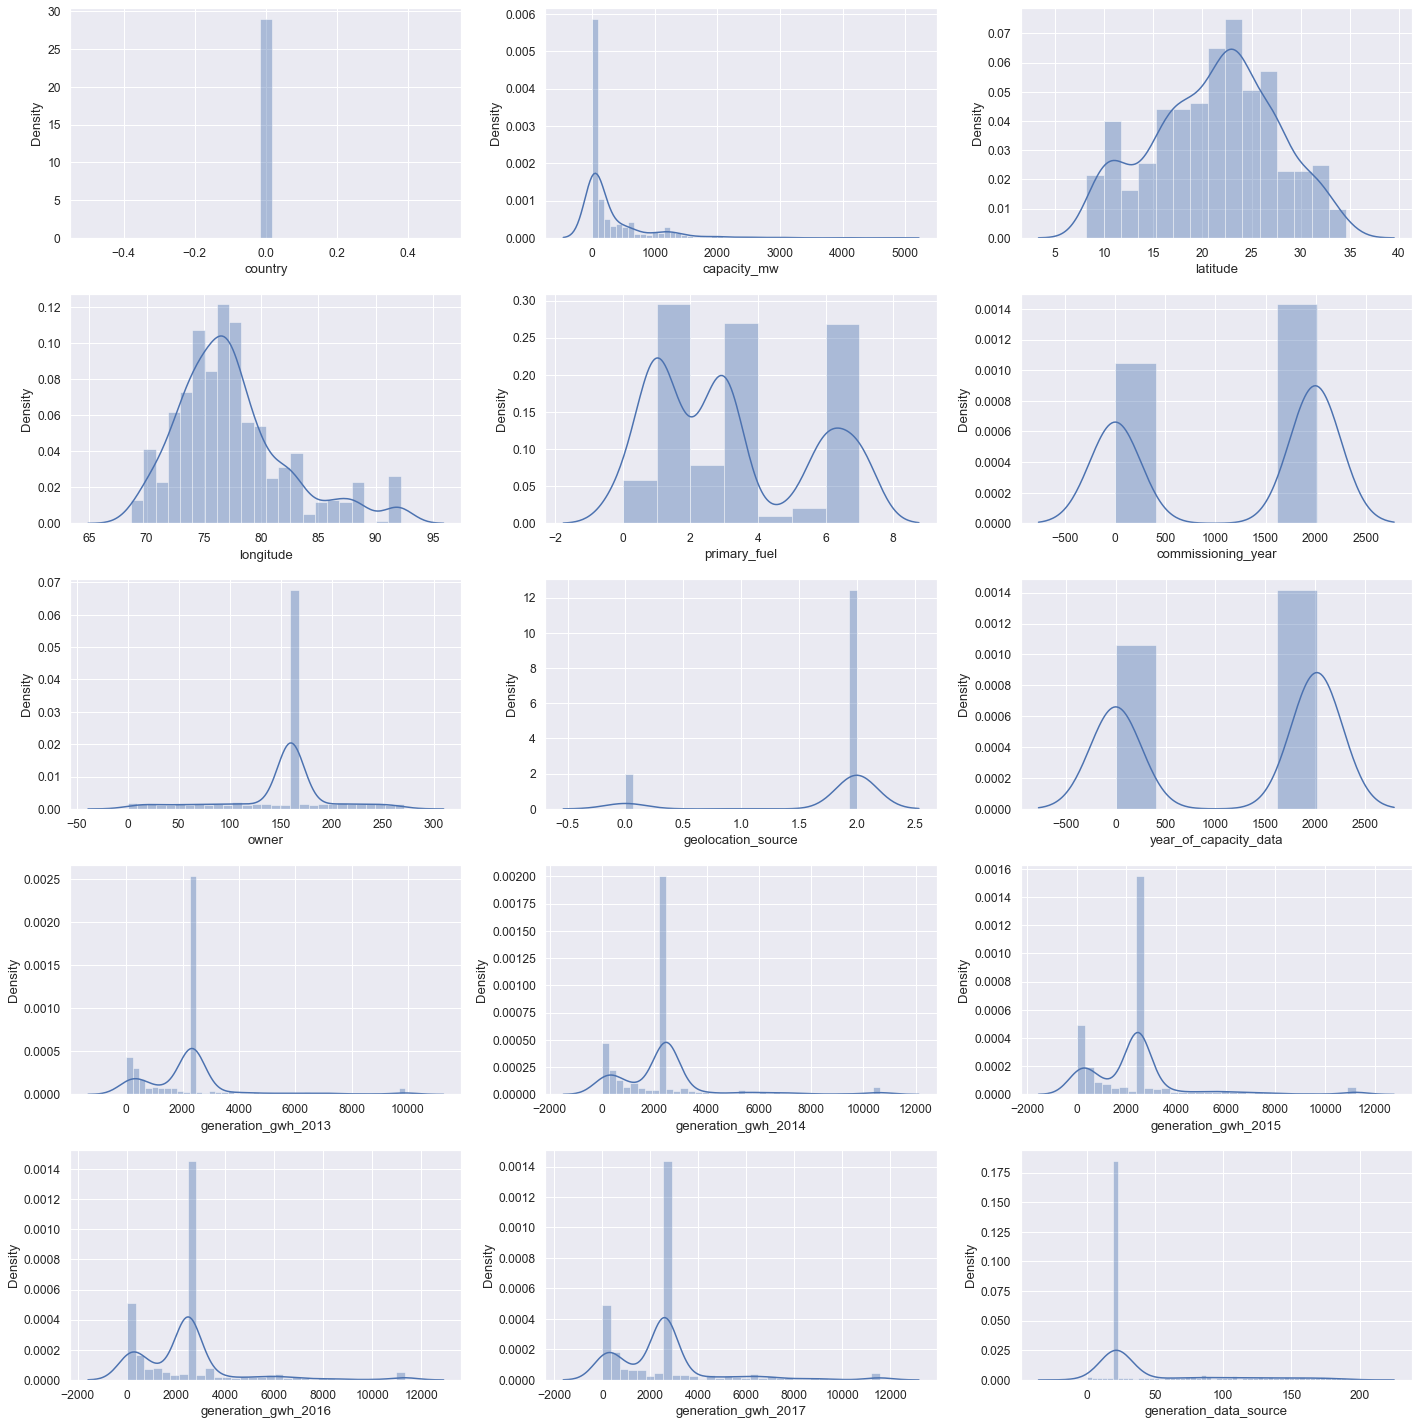

In [141]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
    plotnumber+=1
plt.tight_layout()  

## 11.1 Removing skewed data with log transformation

In [142]:
skew=("owner","geolocation_source","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2015")

In [143]:
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [144]:
df.skew()

country                   0.000000
capacity_mw               3.106672
latitude                 -0.143622
longitude                 1.022213
primary_fuel              0.506373
commissioning_year       -0.309951
owner                    -0.894160
geolocation_source       -2.074108
year_of_capacity_data    -0.291234
generation_gwh_2013      -2.716645
generation_gwh_2014      -2.615587
generation_gwh_2015      -2.338532
generation_gwh_2016      -2.292596
generation_gwh_2017       2.015853
generation_data_source    1.780661
dtype: float64

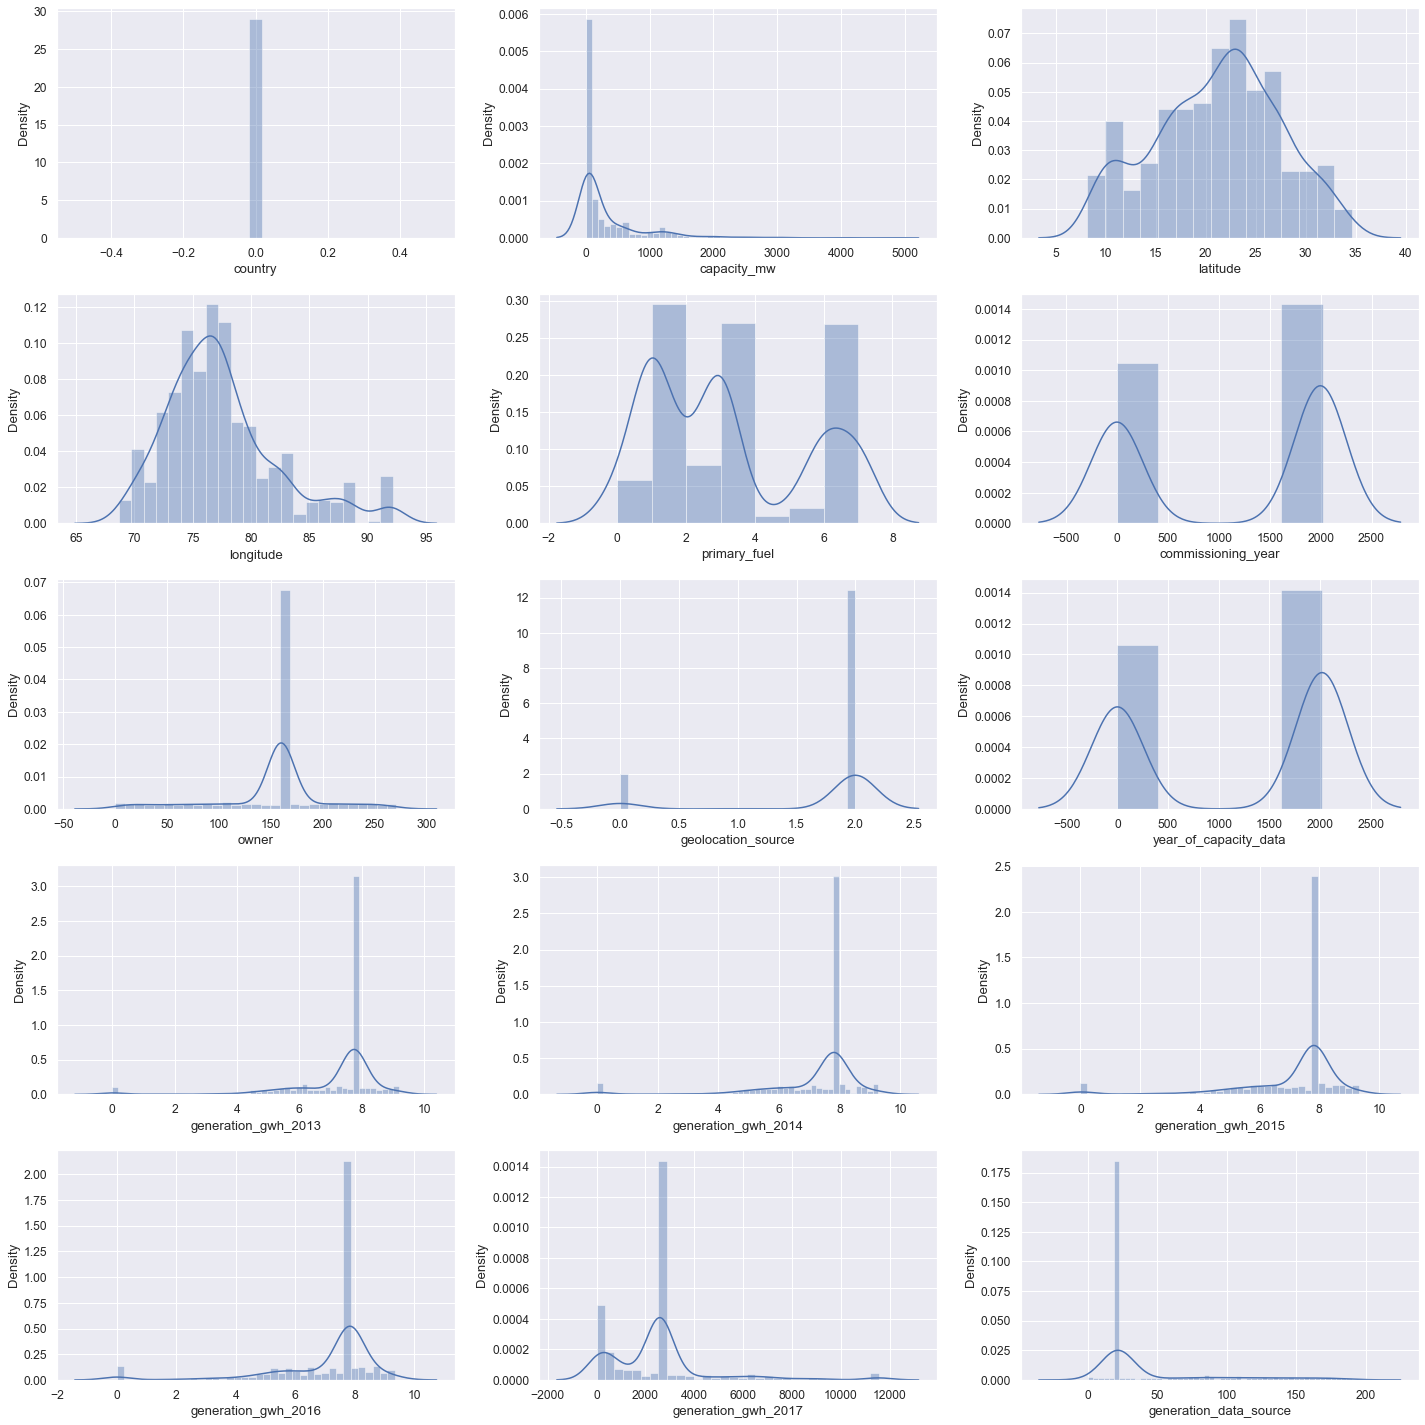

In [145]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
    plotnumber+=1
plt.tight_layout()  

**As we can see our skewed data has been reduced after applying log transformation.**

# 12 Spliting dataset

In [146]:
x=df.drop(["capacity_mw"],axis=1)
y=df.capacity_mw

# 13. Data Transformation with Standard scale 

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
scaler=StandardScaler()

In [149]:
x_scaled=scaler.fit_transform(x)

# 14. Checking Multicollinearity

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
vif=pd.DataFrame()

In [152]:
vif["VIF"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

In [153]:
vif["Feature"]=x.columns

In [154]:
vif

,VIF,Feature
0,NaN,country
1,1.132970,latitude
2,1.310059,longitude
3,2.998149,primary_fuel
4,52.903212,commissioning_year
5,2.279895,owner
6,2.889703,geolocation_source
7,58.610191,year_of_capacity_data
8,3.398443,generation_gwh_2013
9,4.119759,generation_gwh_2014


**As we can see there are multicollinearity issue with commissioning year and year of capacity data, but we will not drop any columns as of now.**

# 14 Feature Extracting with PCA

In [155]:
from sklearn.decomposition import PCA

In [156]:
pca=PCA()

In [157]:
principalComponent=pca.fit_transform(x_scaled)

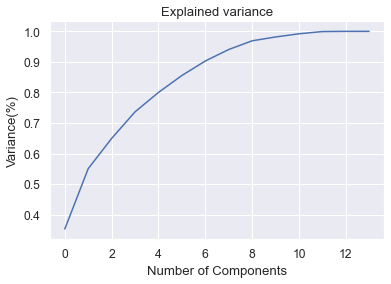

In [158]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance(%)")
plt.title("Explained variance")
plt.show()

**From the above plot we can choose number of components between 8-10 where data will cover more than 95%.**

In [159]:
pca=PCA(n_components=9)

In [160]:
new_df_pca=pca.fit_transform(x_scaled)

In [161]:
new_df_pca

array([[-1.58232227, -0.86347519,  1.6767895 , ..., -0.05044777,
        -0.03480907, -0.04455838],
       [-1.81797909, -0.56501506,  3.27035454, ..., -0.53034456,
         0.45670038,  0.2684865 ],
       [-2.00143567, -1.22964134, -3.21998256, ..., -0.10116193,
         0.309668  ,  0.20623697],
       ...,
       [-1.5249338 , -0.79306772, -0.80773559, ..., -0.45993213,
         0.97516389,  0.29835824],
       [-1.4680147 , -0.15114485, -0.7134208 , ..., -0.29756756,
         0.17464493,  0.16891874],
       [-1.27971196, -0.63422133,  0.83882785, ..., -0.60407009,
         1.28478685,  0.29821392]])

# 15 Building Forecast Model

## 15.1 Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [163]:
mlr=LinearRegression()

## 15.2 Choosing best random state

In [164]:
from sklearn.model_selection import train_test_split
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mlr.fit(x_train,y_train)
    pred_train=mlr.predict(x_train)
    pred_test=mlr.predict(x_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perform well")
        print("At random state")
        print("Training R2 Score is-",r2_score(y_train,pred_train)*100)
        print("Testing R2 Score is-",r2_score(y_test,pred_test)*100)

At random state 14 Model perform well
At random state
Training R2 Score is- 73.23713748899013
Testing R2 Score is- 73.1872922226714
At random state 94 Model perform well
At random state
Training R2 Score is- 73.41052195180377
Testing R2 Score is- 73.35371747259354
At random state 120 Model perform well
At random state
Training R2 Score is- 73.12532598528385
Testing R2 Score is- 73.1478234036493
At random state 282 Model perform well
At random state
Training R2 Score is- 73.15727141989476
Testing R2 Score is- 73.21052649050941
At random state 364 Model perform well
At random state
Training R2 Score is- 73.41776597516788
Testing R2 Score is- 73.40665386275663
At random state 404 Model perform well
At random state
Training R2 Score is- 73.35747188267833
Testing R2 Score is- 73.39442417997152


**We can choose random state 364**

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=364)

In [166]:
mlr=LinearRegression()

In [167]:
mlr.fit(x_train,y_train)

LinearRegression()

## 15.3 Evaluation matrix

In [168]:
y_pred=mlr.predict(x_test)

In [169]:
mlr_score=r2_score(y_test,y_pred)

In [170]:
MAE=mean_absolute_error(y_test,y_pred)

In [171]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [172]:
MAE

181.66930548996

In [173]:
mlr_score

0.7340665386275662

## 15.4 Cross Validation score

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
score=cross_val_score(mlr,x_train,y_train,cv=10)

In [176]:
abs(score).mean()

0.6738298655059094

## 15.7 choosing best CV

In [177]:
for j in range(2,20):
    mlr_scores=cross_val_score(mlr,x_train,y_train,cv=j)
    mlr_s=mlr_scores.mean()
    print("At CV:",j)
    print("Cross Validation score is:",mlr_scores*100)
    print("r2 Score:",mlr_s*100)
    print('\n')

At CV: 2
Cross Validation score is: [67.87016784 71.86707948]
r2 Score: 69.86862366076994


At CV: 3
Cross Validation score is: [71.14722665 71.05546981 68.09752591]
r2 Score: 70.10007412058297


At CV: 4
Cross Validation score is: [70.42652861 64.01195859 75.0625213  66.3234667 ]
r2 Score: 68.95611880169383


At CV: 5
Cross Validation score is: [72.75516468 68.73734434 70.55566673 75.26247508 58.51852737]
r2 Score: 69.16583563771384


At CV: 6
Cross Validation score is: [72.83740489 66.30813183 62.64105848 74.30183285 70.71216032 68.81561557]
r2 Score: 69.26936732415287


At CV: 7
Cross Validation score is: [79.69803513 62.11488335 65.6196025  71.20752033 71.60396641 75.29974955
 52.13736896]
r2 Score: 68.24016089065681


At CV: 8
Cross Validation score is: [82.25461197 39.24041525 69.65531648 57.49415724 75.18906362 69.04849623
 74.20735392 50.3361125 ]
r2 Score: 64.67819090020144


At CV: 9
Cross Validation score is: [83.05536973 45.14605029 69.75607079 67.70007709 66.1245786  73.43

**we can choose CV at 3.**

In [178]:
score=cross_val_score(mlr,x_train,y_train,cv=3)

In [179]:
mlr_cv_score=abs(score).mean()

In [180]:
mlr_cv_score

0.7010007412058297

In [181]:
mlr_score

0.7340665386275662

In [182]:
mlr_MAE=mean_absolute_error(y_test,y_pred)

In [183]:
mlr_MAE

181.66930548996

## 16.1 Random Forest

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=364)

In [186]:
rfr=RandomForestRegressor()

In [187]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

## 16.2 Evaluation Matrix

In [188]:
y_pred=rfr.predict(x_test)

In [189]:
r2_score(y_test,y_pred)

0.8447941042114344

In [190]:
MAE=mean_absolute_error(y_test,y_pred)

In [191]:
MAE

123.47134903474904

In [192]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [193]:
RMSE

245.16112781015138

## 16.3 Cross validaiton score

In [194]:
score=cross_val_score(rfr,x_train,y_train,cv=10)

In [195]:
abs(score).mean()

0.81540332042887

## 16.4 Choose best CV score

In [196]:
for j in range(2,20):
    rfr_scores=cross_val_score(rfr,x_train,y_train,cv=j)
    rfr_s=rfr_scores.mean()
    print("At CV:",j)
    print("Cross Validation score is:",rfr_scores*100)
    print("r2 Score:",rfr_s*100)
    print('\n')

At CV: 2
Cross Validation score is: [79.50799728 79.54829968]
r2 Score: 79.52814847725725


At CV: 3
Cross Validation score is: [84.91738328 84.25908947 82.89907595]
r2 Score: 84.02518290121051


At CV: 4
Cross Validation score is: [82.49809154 76.61457199 83.96765567 81.51745703]
r2 Score: 81.14944405946912


At CV: 5
Cross Validation score is: [83.62866753 84.32080818 81.2578839  85.65497411 74.92545614]
r2 Score: 81.95755797312687


At CV: 6
Cross Validation score is: [82.84389207 87.19302278 73.19055837 86.32146483 86.08564862 74.55857745]
r2 Score: 81.69886068325073


At CV: 7
Cross Validation score is: [84.68117691 86.33524563 82.96355698 75.84721715 78.70977063 88.42445829
 65.24929513]
r2 Score: 80.31581724782721


At CV: 8
Cross Validation score is: [86.02147688 77.67320807 86.82510368 66.2142421  86.50859768 78.68944402
 88.01400701 60.17145275]
r2 Score: 78.76469152259737


At CV: 9
Cross Validation score is: [86.04204972 80.16582586 87.5225186  85.12752131 55.00432431 84.01

**We can choose cv 6.**

In [197]:
score=cross_val_score(rfr,x_train,y_train,cv=10)

In [198]:
rfr_cv_score=abs(score).mean()

In [199]:
rfr_cv_score

0.8109077931977395

In [200]:
rfr_score=r2_score(y_test,y_pred)

In [201]:
rfr_score

0.8447941042114344

In [202]:
rfr_MAE=mean_absolute_error(y_test,y_pred)

In [203]:
rfr_MAE

123.47134903474904

# 17.1 KNN

In [216]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=364)

In [217]:
from sklearn.neighbors import KNeighborsRegressor

In [218]:
knn=KNeighborsRegressor()

In [219]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

## 17.2 Evaluation Matrix

In [220]:
y_pred=knn.predict(x_test)

In [221]:
knn_score=r2_score(y_test,y_pred)

In [222]:
knn_score

0.7579068215552885

In [223]:
MAE=mean_absolute_error(y_test,y_pred)

In [224]:
MAE

142.23174594594593

In [225]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [226]:
RMSE

306.18843243582756

## 17.3 Cross Validation Score

In [227]:
from sklearn.model_selection import cross_val_score

In [228]:
score=cross_val_score(knn,x_train,y_train,cv=10)

In [229]:
abs(score).mean()

0.7048047829103435

## 17.4 Choosing Best CV

In [231]:
for j in range(2,15):
    knn_score=cross_val_score(knn,x_train,y_train,cv=j)
    knn_s=knn_score.mean()
    print("AT CV:-",j)
    print("Cross Validation score is:",knn_score*100)
    print("r2 Score:",knn_s*100)
    print('\n')

AT CV:- 2
Cross Validation score is: [71.88312583 68.43365769]
r2 Score: 70.15839176148245


AT CV:- 3
Cross Validation score is: [80.77239661 73.39576609 70.84933715]
r2 Score: 75.00583328192776


AT CV:- 4
Cross Validation score is: [78.310148   69.36439756 77.82433702 70.28593205]
r2 Score: 73.94620365832064


AT CV:- 5
Cross Validation score is: [78.64093243 78.56618522 71.43956333 70.13870847 65.07084503]
r2 Score: 72.77124689719497


AT CV:- 6
Cross Validation score is: [78.00000573 82.00764531 61.88336496 78.6146224  67.90009377 68.8993445 ]
r2 Score: 72.88417944578592


AT CV:- 7
Cross Validation score is: [80.72159558 79.80544828 75.68105453 69.73969864 79.29707424 76.18042379
 53.83967265]
r2 Score: 73.60928110101402


AT CV:- 8
Cross Validation score is: [80.75522008 72.8425324  77.85514575 54.77116989 79.11586067 74.75725338
 76.06313439 47.79614037]
r2 Score: 70.49455711671119


AT CV:- 9
Cross Validation score is: [79.19195397 78.65464429 81.04329063 79.77533443 46.181747

**We can choose CV 3.**

In [232]:
score=cross_val_score(knn,x_train,y_train,cv=3)

In [233]:
knn_cv_score=abs(score).mean()

In [234]:
knn_cv_score

0.7500583328192777

In [236]:
knn_score=r2_score(y_test,y_pred)

In [237]:
knn_score

0.7579068215552885

In [238]:
knn_MAE=mean_absolute_error(y_test,y_pred)

In [239]:
knn_MAE

142.23174594594593

# 18.1 Gradient BoostingRegressor

In [240]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=364)

In [260]:
from sklearn.ensemble import GradientBoostingRegressor

In [261]:
gbr=GradientBoostingRegressor()

In [262]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

## 18.2 Evaluation Matrix

In [263]:
y_pred=gbr.predict(x_test)

In [264]:
r2_score(y_test,y_pred)

0.8246740403838451

In [265]:
MAE=mean_absolute_error(y_test,y_pred)

In [266]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [267]:
MAE

136.52379278990762

In [268]:
RMSE

260.567721587359

## 18.3 Cross Validation score

In [269]:
score=cross_val_score(gbr,x_train,y_train,cv=10)

In [270]:
abs(score).mean()

0.789997601296432

## 18.4 Find best CV

In [272]:
for j in range(2,12):
    gbr_score=cross_val_score(gbr,x_train,y_train,cv=j)
    gbr_s=gbr_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",gbr_score*100)
    print("R2 Score:",gbr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [76.16016221 78.93585748]
R2 Score: 77.54800984364527


At CV:- 3
Cross validation score is: [81.89645671 82.25975118 81.42531632]
R2 Score: 81.86050806946561


At CV:- 4
Cross validation score is: [81.38562217 64.53917019 81.91249464 78.72521079]
R2 Score: 76.64062445117224


At CV:- 5
Cross validation score is: [82.3401274  72.90126032 80.64150701 86.50676151 70.99005531]
R2 Score: 78.67594231164418


At CV:- 6
Cross validation score is: [81.0951857  85.25066248 61.82157783 87.64181453 87.96243846 70.44588836]
R2 Score: 79.03626122792055


At CV:- 7
Cross validation score is: [81.63897141 81.50374787 75.44067418 67.81580851 75.37593962 86.54504869
 67.85110463]
R2 Score: 76.59589927230445


At CV:- 8
Cross validation score is: [78.90105247 76.25279421 82.52364528 53.79246921 87.29423605 75.58242981
 88.01661334 63.24680511]
R2 Score: 75.7012556856903


At CV:- 9
Cross validation score is: [78.67578232 82.40553777 84.42420771 83.66753227 42.3147806

**We can choose cv 3.**

In [273]:
score=cross_val_score(gbr,x_train,y_train,cv=3)

In [275]:
gbr_cv_score=abs(score).mean()

In [276]:
gbr_cv_score

0.8143300669903909

In [277]:
gbr_score=r2_score(y_test,y_pred)

In [278]:
gbr_score

0.8246740403838451

In [279]:
gbr_MAE=mean_absolute_error(y_test,y_pred)

In [280]:
gbr_MAE

136.52379278990762

# 19.1 Lets choose the best model using Cross validation comparism

In [281]:
Multiplelinear_Regression={"R2 Score":round(mlr_score,2),
                    "CV Score":round(mlr_cv_score,2),
                    "Difference":mlr_score-mlr_cv_score,
                    "MAE":mlr_MAE}
KNeighbors_Regressor={"R2 Score":round(knn_score,2),
                    "CV Score":round(knn_cv_score,2),
                    "Difference":knn_score-knn_cv_score,
                     "MAE":knn_MAE}
Random_Forest={"R2 Score":round(rfr_score,2),
                    "CV Score":round(rfr_cv_score,2),
                    "Difference":rfr_score-rfr_cv_score,
                     "MAE":rfr_MAE}
GradientBoosting_Regressor={"R2 Score":round(gbr_score,2),
                    "CV Score":round(gbr_cv_score,2),
                    "Difference":gbr_score-gbr_cv_score,
                     "MAE":gbr_MAE}



In [283]:
data=np.array([[mlr_score,mlr_cv_score,mlr_score-mlr_cv_score,mlr_MAE],[knn_score,knn_cv_score,knn_score-knn_cv_score,knn_MAE],[rfr_score,rfr_cv_score,rfr_score-rfr_cv_score,rfr_MAE],[gbr_score,gbr_cv_score,gbr_score-gbr_cv_score,gbr_MAE]])

In [284]:
index_value=["MultiLinear Regression","KNN Regression","RandomForest Regression","GradientBoosting Regressor"]

In [285]:
columns_value=["r2 Score","Cross Validation Score","Difference","MAE"]

In [286]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [287]:
model_selection

,r2 Score,Cross Validation Score,Difference,MAE
MultiLinear Regression,0.734067,0.701001,0.033066,181.669305
KNN Regression,0.757907,0.750058,0.007848,142.231746
RandomForest Regression,0.844794,0.810908,0.033886,123.471349
GradientBoosting Regressor,0.824674,0.814330,0.010344,136.523793


**We can see Random Forest Regresion model is performing good compare to others.So we will choose Random Forest Regression model.**

# 20. Hyperparameter Tuning with Grid SearchCV

In [288]:
from sklearn.model_selection import GridSearchCV

In [289]:
rfr=RandomForestRegressor()

In [293]:
params={"n_estimators":[50,100,150],
       "criterion":["mse","mae"],
       "max_depth":[15,20,25,30],
       "min_samples_split":[2,10,15,18,20],
       "min_samples_leaf":[1,3,5,7,9]
       }

In [294]:
grid=GridSearchCV(rfr,param_grid=params)

In [295]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [15, 20, 25, 30],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 10, 15, 18, 20],
                         'n_estimators': [50, 100, 150]})

In [298]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [299]:
rfr=grid.best_estimator_

In [301]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=50)

In [302]:
y_pred=rfr.predict(x_test)

In [304]:
rfr_score=r2_score(y_test,y_pred)

In [305]:
rfr_score

0.8466237757576506

**As we have seen after hypertuning slightly model performance has incrased from 84.47 to 84.66.**

# 21. Saving model

In [306]:
import pickle

In [308]:
filename="powerplant_capacity_mw.predict.pkl"

In [309]:
pickle.dump(rfr,open(filename,"wb"))

# Problem part 2: 
## 22. Predicting Fuel Type

**As we have seen in Exploratory Data Analysis Fuel Type having categorical so we need to perform classification task.**

# 23.Dealing outlier of capacity_mw feature

<AxesSubplot:xlabel='capacity_mw'>

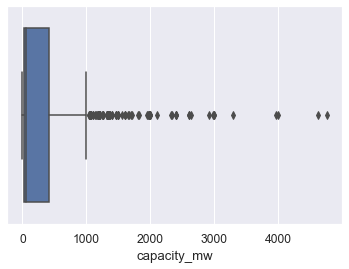

In [360]:
sns.boxplot(df["capacity_mw"])

In [361]:
upper_limit=df["capacity_mw"].mean()+3*df["capacity_mw"].std()
lower_limit=df["capacity_mw"].mean()-3*df["capacity_mw"].std()

df["capacity_mw"]=np.where(df["capacity_mw"]>upper_limit,upper_limit,
                        np.where(df["capacity_mw"]<lower_limit,lower_limit,
                                df["capacity_mw"]
                                )
                        )

<AxesSubplot:xlabel='capacity_mw'>

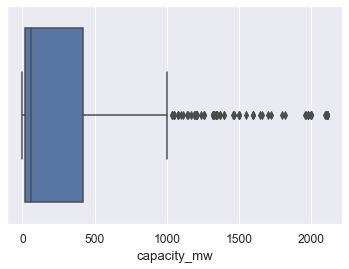

In [362]:
sns.boxplot(df["capacity_mw"])

# 24 Dealing with skewness

In [363]:
df["capacity_mw"].skew()

2.0286768755430673

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

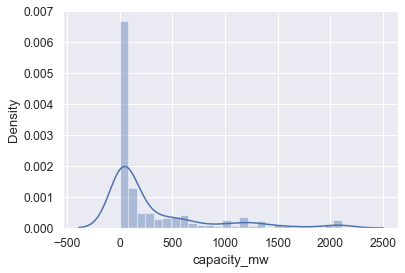

In [364]:
sns.distplot(df["capacity_mw"])

In [366]:
df["capacity_mw"]=np.log1p(df["capacity_mw"])

In [367]:
df["capacity_mw"].skew()

0.0548183540639457

# 23 Spliting Train Test Split

In [368]:
x=df.drop("primary_fuel",axis=1)

In [369]:
y=df.primary_fuel

# 24 Performing Standard Scaler

In [370]:
from sklearn.preprocessing import StandardScaler

In [371]:
scaler=StandardScaler()

In [372]:
x_scaled=scaler.fit_transform(x)

# 25 Model Building

# 25.1 Logistic Regression

In [373]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [374]:
lr=LogisticRegression(multi_class='multinomial')

In [382]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=392)

In [383]:
lr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

## 25.2 Evaluation Matrix

In [402]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_confusion_matrix

In [403]:
y_pred=lr.predict(x_test)

In [404]:
accuracy_score(y_test,y_pred)

0.7837837837837838

In [407]:
confusion_matrix(y_test,y_pred)

array([[11,  3,  0,  0,  0,  0,  0,  0],
       [ 4, 64,  2, 12,  1,  0,  0,  1],
       [ 1,  7,  1,  8,  1,  0,  0,  0],
       [ 0,  7,  2, 68,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 29]], dtype=int64)

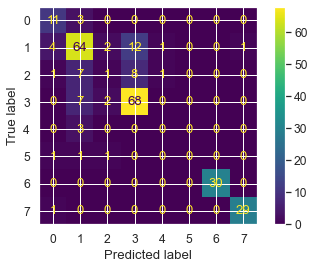

In [408]:
plot_confusion_matrix(lr,x_test,y_test,values_format=".3g")

In [410]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.61      0.79      0.69        14
           1       0.75      0.76      0.76        84
           2       0.17      0.06      0.08        18
           3       0.77      0.88      0.82        77
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        30
           7       0.97      0.97      0.97        30

    accuracy                           0.78       259
   macro avg       0.53      0.56      0.54       259
weighted avg       0.75      0.78      0.76       259



In [411]:
lr_acc_score=accuracy_score(y_test,y_pred)

In [412]:
lr_acc_score

0.7837837837837838

## 25.3 Cross Validation 

In [413]:
from sklearn.model_selection import cross_val_score,cross_validate

In [415]:
cross_val_score(lr,x_scaled,y,cv=5)

array([0.77456647, 0.73988439, 0.79651163, 0.80232558, 0.79651163])

In [416]:
lr_cv_score=cross_val_score(lr,x_scaled,y,cv=5).mean()

In [417]:
lr_cv_score

0.7819599408522652

## 25.4 Chossing Best CV

In [454]:
for j in range(2,12):
    lr_score=cross_val_score(lr,x_train,y_train,cv=j)
    lr_s=lr_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",lr_score*100)
    print("Accuracy Score:",lr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [75.49668874 78.0730897 ]
Accuracy Score: 76.78488922135926


At CV:- 3
Cross validation score is: [75.62189055 79.10447761 77.11442786]
Accuracy Score: 77.28026533996683


At CV:- 4
Cross validation score is: [76.1589404  76.82119205 78.14569536 76.66666667]
Accuracy Score: 76.94812362030905


At CV:- 5
Cross validation score is: [76.03305785 76.03305785 75.20661157 81.66666667 75.83333333]
Accuracy Score: 76.95454545454547


At CV:- 6
Cross validation score is: [75.24752475 77.22772277 73.26732673 81.         79.         77.        ]
Accuracy Score: 77.12376237623762


At CV:- 7
Cross validation score is: [74.71264368 80.23255814 73.25581395 79.06976744 79.06976744 79.06976744
 73.25581395]
Accuracy Score: 76.9523045786077


At CV:- 8
Cross validation score is: [72.36842105 77.63157895 73.68421053 80.         80.         80.
 84.         69.33333333]
Accuracy Score: 77.12719298245614


At CV:- 9
Cross validation score is: [73.13432836 82.08955224 

**We can choose cv 11.**

In [419]:
cross_val_score(lr,x_scaled,y,cv=11)

array([0.78481013, 0.78481013, 0.74683544, 0.78481013, 0.75641026,
       0.83333333, 0.78205128, 0.78205128, 0.79487179, 0.73076923,
       0.87179487])

In [420]:
lr_cv_score=cross_val_score(lr,x_scaled,y,cv=11).mean()

In [421]:
lr_cv_score

0.7865952612788056

In [422]:
lr_acc_score=accuracy_score(y_test,y_pred)

In [423]:
lr_acc_score

0.7837837837837838

# 26.KNN Classifier

In [611]:
from sklearn.neighbors import KNeighborsClassifier

In [612]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=392)

In [613]:
knn=KNeighborsClassifier()

In [614]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [615]:
y_pred=knn.predict(x_test)

## 26.1 Evaluation Matrix

In [616]:
accuracy_score(y_test,y_pred)

0.7722007722007722

In [617]:
confusion_matrix(y_test,y_pred)

array([[12,  2,  0,  0,  0,  0,  0,  0],
       [ 8, 63,  4,  9,  0,  0,  0,  0],
       [ 0,  7,  3,  8,  0,  0,  0,  0],
       [ 0,  7,  5, 65,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0],
       [ 3,  0,  0,  0,  0,  0,  0, 27]], dtype=int64)

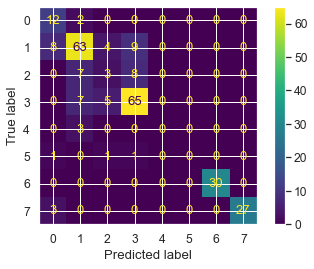

In [618]:
plot_confusion_matrix(knn,x_test,y_test,values_format=".3g")

In [619]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.50      0.86      0.63        14
           1       0.77      0.75      0.76        84
           2       0.23      0.17      0.19        18
           3       0.78      0.84      0.81        77
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        30
           7       1.00      0.90      0.95        30

    accuracy                           0.77       259
   macro avg       0.54      0.56      0.54       259
weighted avg       0.76      0.77      0.76       259



In [620]:
knn_acc_score=accuracy_score(y_test,y_pred)

In [621]:
knn_acc_score

0.7722007722007722

## 26.2 Cross Validation

In [451]:
from sklearn.model_selection import cross_val_score,cross_validate

In [622]:
cross_val_score(knn,x_scaled,y,cv=5)

array([0.80346821, 0.76300578, 0.80813953, 0.76744186, 0.81976744])

In [623]:
cross_val_score(knn,x_scaled,y,cv=5).mean()

0.7923645651297218

## 26.3 Finding Best CV

In [624]:
for j in range(2,12):
    knn_score=cross_val_score(knn,x_train,y_train,cv=j)
    knn_s=knn_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",knn_score*100)
    print("Accuracy Score:",knn_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [78.14569536 75.41528239]
Accuracy Score: 76.78048887813249


At CV:- 3
Cross validation score is: [76.61691542 81.09452736 75.62189055]
Accuracy Score: 77.77777777777779


At CV:- 4
Cross validation score is: [76.1589404  80.79470199 78.14569536 75.33333333]
Accuracy Score: 77.60816777041943


At CV:- 5
Cross validation score is: [78.51239669 80.16528926 77.68595041 81.66666667 76.66666667]
Accuracy Score: 78.93939393939394


At CV:- 6
Cross validation score is: [78.21782178 79.20792079 78.21782178 80.         79.         76.        ]
Accuracy Score: 78.44059405940594


At CV:- 7
Cross validation score is: [78.16091954 81.39534884 81.39534884 81.39534884 81.39534884 79.06976744
 72.09302326]
Accuracy Score: 79.27215794096306


At CV:- 8
Cross validation score is: [76.31578947 80.26315789 78.94736842 82.66666667 80.         81.33333333
 78.66666667 68.        ]
Accuracy Score: 78.27412280701755


At CV:- 9
Cross validation score is: [77.6119403  80.

**Best cv can choose 7.**

In [625]:
cross_val_score(knn,x_scaled,y,cv=7)

array([0.82258065, 0.7804878 , 0.79674797, 0.81300813, 0.75609756,
       0.82113821, 0.78861789])

In [626]:
knn_cv_score=cross_val_score(knn,x_scaled,y,cv=7).mean()

In [627]:
knn_cv_score

0.7969540294481285

In [628]:
knn_acc_score

0.7722007722007722

# 27.1 Random Classifier

In [462]:
from sklearn.ensemble import RandomForestClassifier

In [463]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=392)

In [464]:
rfc=RandomForestClassifier()

In [465]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

## 27.2 Evaluation Matrix

In [467]:
y_pred=rfc.predict(x_test)

In [468]:
accuracy_score(y_test,y_pred)

0.8648648648648649

In [469]:
rfc_acc_score=accuracy_score(y_test,y_pred)

In [470]:
rfc_acc_score

0.8648648648648649

In [471]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0,  0,  0,  0,  0,  0],
       [ 4, 74,  1,  5,  0,  0,  0,  0],
       [ 1, 10,  3,  3,  0,  1,  0,  0],
       [ 0,  4,  1, 72,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

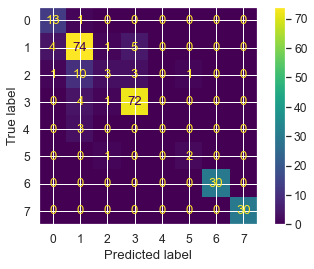

In [472]:
plot_confusion_matrix(rfc,x_test,y_test,values_format=".3g")

## 27.3 Cross Validation

In [473]:
cross_val_score(rfc,x_scaled,y,cv=5)

array([0.83236994, 0.85549133, 0.85465116, 0.83139535, 0.87790698])

In [474]:
rfc_cv_score=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [475]:
rfc_acc_score

0.8648648648648649

## 27.4 Finding Best CV`

In [476]:
for j in range(2,12):
    rfc_score=cross_val_score(rfc,x_train,y_train,cv=j)
    rfc_s=rfc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rfc_score*100)
    print("Accuracy Score:",rfc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [79.8013245  82.39202658]
Accuracy Score: 81.09667554069217


At CV:- 3
Cross validation score is: [82.08955224 82.08955224 81.09452736]
Accuracy Score: 81.75787728026535


At CV:- 4
Cross validation score is: [84.76821192 80.13245033 82.1192053  81.33333333]
Accuracy Score: 82.08830022075055


At CV:- 5
Cross validation score is: [86.7768595  81.81818182 80.16528926 84.16666667 82.5       ]
Accuracy Score: 83.08539944903582


At CV:- 6
Cross validation score is: [86.13861386 79.20792079 75.24752475 85.         83.         85.        ]
Accuracy Score: 82.26567656765677


At CV:- 7
Cross validation score is: [85.05747126 86.04651163 80.23255814 84.88372093 84.88372093 83.72093023
 82.55813953]
Accuracy Score: 83.91186466567379


At CV:- 8
Cross validation score is: [85.52631579 82.89473684 82.89473684 84.         86.66666667 89.33333333
 84.         81.33333333]
Accuracy Score: 84.58114035087718


At CV:- 9
Cross validation score is: [86.56716418 86.

**we can choose cv 8.**

In [477]:
cross_val_score(rfc,x_scaled,y,cv=8)

array([0.7962963 , 0.85185185, 0.86111111, 0.87037037, 0.82407407,
       0.82407407, 0.85046729, 0.88785047])

In [478]:
rfc_cv_score=cross_val_score(rfc,x_scaled,y,cv=8).mean()

In [479]:
rfc_cv_score

0.8480443059882312

In [480]:
rfc_acc_score

0.8648648648648649

# 28.1 AdaBoost Classifier

In [481]:
from sklearn.ensemble import AdaBoostClassifier

In [482]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=392)

In [483]:
adc=AdaBoostClassifier()

In [484]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

## 28.2 Evaluation Matrix

In [485]:
accuracy_score(y_test,y_pred)

0.8648648648648649

In [486]:
adc_acc_score=accuracy_score(y_test,y_pred)

In [487]:
adc_acc_score

0.8648648648648649

In [488]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0,  0,  0,  0,  0,  0],
       [ 4, 74,  1,  5,  0,  0,  0,  0],
       [ 1, 10,  3,  3,  0,  1,  0,  0],
       [ 0,  4,  1, 72,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

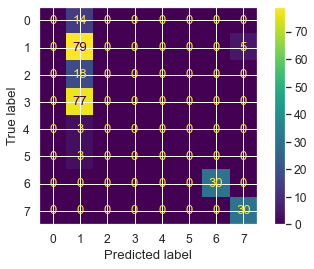

In [489]:
plot_confusion_matrix(adc,x_test,y_test,values_format=".3g")

## 28.3 Cross Validation

In [490]:
cross_val_score(adc,x_scaled,y,cv=5)

array([0.52601156, 0.55491329, 0.54651163, 0.55232558, 0.55813953])

In [491]:
adc_cv_score=cross_val_score(adc,x_scaled,y,cv=5).mean()

In [492]:
adc_cv_score

0.5475803199354752

## 28.4 Choosing Best CV

In [493]:
for j in range(2,15):
    adc_score=cross_val_score(adc,x_scaled,y,cv=j)
    adc_s=adc_score.mean()
    print("AT CV:",j)
    print("Cross Validation score is:",adc_score*100)
    print("Accuracy Score:",adc_s*100)
    print('\n')

AT CV: 2
Cross Validation score is: [54.06032483 55.45243619]
Accuracy Score: 54.75638051044084


AT CV: 3
Cross Validation score is: [53.81944444 55.05226481 55.40069686]
Accuracy Score: 54.75746870563945


AT CV: 4
Cross Validation score is: [53.24074074 54.62962963 55.81395349 55.34883721]
Accuracy Score: 54.7582902670112


AT CV: 5
Cross Validation score is: [52.60115607 55.49132948 54.65116279 55.23255814 55.81395349]
Accuracy Score: 54.75803199354752


AT CV: 6
Cross Validation score is: [53.47222222 54.16666667 54.16666667 56.25       55.24475524 55.24475524]
Accuracy Score: 54.757511007511006


AT CV: 7
Cross Validation score is: [53.22580645 54.47154472 56.09756098 53.65853659 55.28455285 55.28455285
 55.28455285]
Accuracy Score: 54.758158180660146


AT CV: 8
Cross Validation score is: [54.62962963 51.85185185 56.48148148 53.7037037  56.48148148 54.62962963
 55.14018692 55.14018692]
Accuracy Score: 54.75726895119419


AT CV: 9
Cross Validation score is: [55.20833333 50.       

**we can choose best cv 11.**

In [494]:
cross_val_score(adc,x_scaled,y,cv=11)

array([0.55696203, 0.49367089, 0.5443038 , 0.55696203, 0.53846154,
       0.55128205, 0.56410256, 0.55128205, 0.55128205, 0.56410256,
       0.55128205])

In [495]:
adc_cv_score=cross_val_score(adc,x_scaled,y,cv=11).mean()

In [496]:
adc_cv_score

0.547608509633826

In [497]:
adc_acc_score

0.8648648648648649

# 29.1 Grandient Boosting

In [498]:
from sklearn.ensemble import GradientBoostingClassifier

In [499]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=392)

In [500]:
gbc=GradientBoostingClassifier()

In [501]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

## 29.2 Evaluation Matrix

In [502]:
y_pred=gbc.predict(x_test)

In [503]:
accuracy_score(y_test,y_pred)

0.8648648648648649

In [504]:
confusion_matrix(y_test,y_pred)

array([[12,  2,  0,  0,  0,  0,  0,  0],
       [ 3, 74,  0,  5,  1,  1,  0,  0],
       [ 1,  6,  7,  3,  0,  1,  0,  0],
       [ 0,  6,  1, 70,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

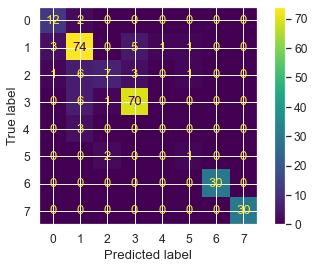

In [505]:
plot_confusion_matrix(gbc,x_test,y_test,values_format=".3g")

## 29.3 Cross Validation

In [506]:
cross_val_score(gbc,x_scaled,y,cv=5)

array([0.83236994, 0.87861272, 0.84883721, 0.84883721, 0.85465116])

In [507]:
gbc_cv_score=cross_val_score(gbc,x_scaled,y,cv=5).mean()

## 29.4 Choosing Best CV

In [508]:
for j in range(2,15):
    gbc_score=cross_val_score(gbc,x_scaled,y,cv=j)
    gbc_s=gbc_score.mean()
    print("AT CV:",j)
    print("Cross Validation score is:",gbc_score*100)
    print("Accuracy Score:",gbc_s*100)
    print('\n')

AT CV: 2
Cross Validation score is: [82.59860789 82.59860789]
Accuracy Score: 82.5986078886311


AT CV: 3
Cross Validation score is: [84.72222222 84.32055749 83.97212544]
Accuracy Score: 84.3383017163505


AT CV: 4
Cross Validation score is: [84.72222222 85.64814815 82.79069767 85.58139535]
Accuracy Score: 84.68561584840654


AT CV: 5
Cross Validation score is: [82.65895954 88.43930636 84.88372093 84.88372093 84.88372093]
Accuracy Score: 85.14988573733028


AT CV: 6
Cross Validation score is: [83.33333333 88.88888889 87.5        82.63888889 82.51748252 83.91608392]
Accuracy Score: 84.79911292411293


AT CV: 7
Cross Validation score is: [83.06451613 82.92682927 89.43089431 86.17886179 83.7398374  85.36585366
 86.17886179]
Accuracy Score: 85.26937919148777


AT CV: 8
Cross Validation score is: [81.48148148 84.25925926 87.96296296 87.03703704 80.55555556 82.40740741
 82.24299065 85.98130841]
Accuracy Score: 83.99100034614054


AT CV: 9
Cross Validation score is: [82.29166667 80.20833333 8

**we can choose cv 10.**

In [513]:
cross_val_score(gbc,x_scaled,y,cv=13)

array([0.86567164, 0.82089552, 0.8358209 , 0.88059701, 0.90909091,
       0.89393939, 0.90909091, 0.78787879, 0.84848485, 0.84848485,
       0.83333333, 0.81818182, 0.86363636])

In [585]:
gbc_cv_score=cross_val_score(gbc,x_scaled,y,cv=13).mean()

In [586]:
gbc_cv_score

0.8550255714434818

In [590]:
gbc_acc_score=accuracy_score(y_test,y_pred)

In [591]:
gbc_acc_score

0.8648648648648649

# 30. Lets Choose the Best Classification Model 

## 30.1 Choosing Best Model by Cross Validation score

In [629]:
Logistic_Regression={"Accuracy Score":np.round(lr_acc_score,2),
                    "CV Score":np.round(lr_cv_score,2),
                    "Difference":lr_acc_score-lr_cv_score,
                    }

KNeighbors_Classifier={"Accuracy Score":np.round(knn_acc_score,2),
                    "CV Score":np.round(knn_cv_score,2),
                    "Difference":knn_acc_score-knn_cv_score,
                     }
Random_Forest_Classifier={"R2 Score":np.round(rfc_acc_score,2),
                    "CV Score":np.round(rfc_cv_score,2),
                    "Difference":rfc_acc_score-rfc_cv_score,
                     }
AdaBooster_Classifier={"R2 Score":np.round(adc_acc_score,2),
                    "CV Score":np.round(adc_cv_score,2),
                    "Difference":adc_acc_score-adc_cv_score,
                     }
GradientBoosting_Classifier={"R2 Score":np.round(gbc_acc_score,2),
                    "CV Score":np.round(gbc_cv_score,2),
                    "Difference":gbc_acc_score-gbc_cv_score,
                    }


In [630]:
data=np.array([[lr_acc_score,lr_cv_score,lr_acc_score-mlr_cv_score],[knn_acc_score,knn_cv_score,knn_acc_score-knn_cv_score],[rfc_acc_score,rfc_cv_score,rfc_acc_score-rfc_cv_score],[adc_acc_score,adc_cv_score,adc_acc_score-adc_cv_score],[gbc_acc_score,gbc_cv_score,gbc_acc_score-gbc_cv_score]])

In [631]:
index_value=["Logistic Regression","KNN Classifier","RandomForest Classifier","AdaBooster Classifier","GradientBoosting Classifier"]

In [632]:
columns_value=["Accuracy Score","Cross Validation Score","Difference"]

In [633]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [634]:
model_selection

,Accuracy Score,Cross Validation Score,Difference
Logistic Regression,0.783784,0.786595,0.082783
KNN Classifier,0.772201,0.796954,-0.024753
RandomForest Classifier,0.864865,0.848044,0.016821
AdaBooster Classifier,0.864865,0.852695,0.012170
GradientBoosting Classifier,0.864865,0.855026,0.009839


**As we can see from above table GradiendBoosting Classifier model is performing better than other model.**

## 30.2 Plot ROC AUC Curve for GradientBoosting Classifier

In [600]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.multiclass import OneVsRestClassifier

In [635]:
clf = OneVsRestClassifier(gbc)
clf.fit(x_train, y_train)
gbc_pred = clf.predict(x_test)
gbc_pred_prob = clf.predict_proba(x_test)

fpr = {}
tpr = {}
thresh ={}
n_class=8
for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test, gbc_pred_prob[:,i], pos_label=i)

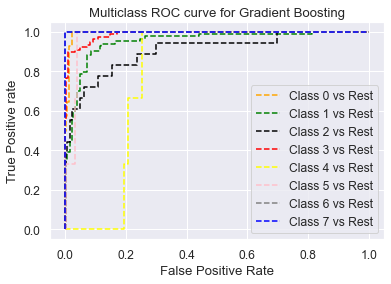

In [636]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='black', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='gray', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve for Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

# 31. Hyperparameter tuning for Gradient Boosting Model

In [637]:
from sklearn.model_selection import GridSearchCV

In [638]:
grid_param={"max_depth":range(4,12,2),
           "learning_rate":np.arange(0.1,1,0.1),
           "min_samples_split":range(4,8,2)
           }

In [639]:
grid=GridSearchCV(gbc,param_grid=grid_param)

In [640]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [641]:
grid.best_params_

{'learning_rate': 0.30000000000000004, 'max_depth': 10, 'min_samples_split': 6}

In [644]:
gbc=grid.best_estimator_

In [645]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=10,
                           min_samples_split=6)

In [648]:
y_pred=gbc.predict(x_test)

In [649]:
gbc_acc_score=r2_score(y_test,y_pred)

In [650]:
gbc_acc_score

0.901179995905377

**As we can see model accuracy score has increased from 86.48 to 90.11 after tuning hyperparamet.**

# 31. Model Saving

In [651]:
filename="powerplant_fuelType.pkl"

In [652]:
pickle.dump(rfr,open(filename,"wb"))

# 32. Conclusion

### 32.1 Predicting Capacity mw

**As we have seen for predicting capacity mw "Random Forest Regression Model" is performing better.**

### 32.2 Predicting Fuel Type

**For predicting fuel Type "GradientBoosting Classifier Model" is performing better.**